<a href="https://colab.research.google.com/github/melindasiburian/dynamic_pricing/blob/main/Copy_of_dataset_making_dp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compile The Data

### Jumlah wisatawan mancanegara

In [ ]:
import pandas as pd
df = pd.read_csv("/content/raw_data - Banyaknya Wisatawan Mancanegara .csv")
df.head()

year  month  total_visitors
0  2009      1          174541
1  2009      2          147704
2  2009      3          168205
3  2009      4          188776
4  2009      5          190803

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   year            200 non-null    int64
 1   month           200 non-null    int64
 2   total_visitors  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [ ]:
# Combine 'year' and 'month' columns into a single 'date' column
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

# Display the DataFrame with the new 'date' column and its info
print("DataFrame with new 'date' column:")
display(df.head())
print("\nInfo of the DataFrame with 'date' column:")
df.info()

DataFrame with new 'date' column:


year  month  total_visitors       date
0  2009      1          174541 2009-01-01
1  2009      2          147704 2009-02-01
2  2009      3          168205 2009-03-01
3  2009      4          188776 2009-04-01
4  2009      5          190803 2009-05-01


Info of the DataFrame with 'date' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            200 non-null    int64         
 1   month           200 non-null    int64         
 2   total_visitors  200 non-null    int64         
 3   date            200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.4 KB


## Events and holiday data


In [ ]:
import pandas as pd

# Create a dummy dataset for major events, holidays, and school breaks in Bali (2009-2025)
# This is a simplified dummy dataset. A real dataset would require external data sources.
data = {
    'event_name': [
        'Nyepi', 'Eid al-Fitr Holiday', 'Bali Arts Festival', 'Independence Day',
        'Galungan and Kuningan', 'Christmas Holiday', 'New Year Holiday',
        'School Holiday (Mid-year)', 'School Holiday (End-year)',
        'G20 Summit Bali' # Specific to 2022, keep for that year
    ],
    'start_date_template': [
        '-03-03', '-05-02', '-06-12', '-08-17',
        '-06-08', '-12-25', '-01-01',
        '-06-20', '-12-19',
        '2022-11-15' # G20 Summit
    ],
     'end_date_template': [
        '-03-04', '-05-03', '-07-10', '-08-17',
        '-06-18', '-12-26', '-01-01',
        '-07-01', '-12-30',
        '2022-11-16' # G20 Summit
    ]
}

event_templates_df = pd.DataFrame(data)

# Generate events for the years 2009 to 2025
all_events_data = []
for year in range(2009, 2026):
    for index, row in event_templates_df.iterrows():
        event_name = row['event_name']
        start_template = row['start_date_template']
        end_template = row['end_date_template']

        # Handle G20 Summit as a specific event in 2022
        if event_name == 'G20 Summit Bali':
            if year == 2022:
                 all_events_data.append({
                    'event_name': event_name,
                    'start_date': pd.to_datetime(start_template),
                    'end_date': pd.to_datetime(end_template)
                })
            continue # Skip for other years


        try:
            start_date = pd.to_datetime(str(year) + start_template)
            end_date = pd.to_datetime(str(year) + end_template)
            # Adjust end date for events that cross year boundaries (like New Year)
            if end_date < start_date:
                 end_date = pd.to_datetime(str(year + 1) + end_template)

            all_events_data.append({
                'event_name': event_name,
                'start_date': start_date,
                'end_date': end_date
            })
        except Exception as e:
            print(f"Could not create date for year {year} and event {event_name}: {e}")


events_df = pd.DataFrame(all_events_data)


# Convert date columns to datetime objects (already done during creation but double check)
events_df['start_date'] = pd.to_datetime(events_df['start_date'])
events_df['end_date'] = pd.to_datetime(events_df['end_date'])


print("Dummy Events, Holidays, and School Breaks Data (2009-2025):")
display(events_df.head())
print("\nChecking data types:")
print(events_df.info())

Dummy Events, Holidays, and School Breaks Data (2009-2025):


event_name start_date   end_date
0                  Nyepi 2009-03-03 2009-03-04
1    Eid al-Fitr Holiday 2009-05-02 2009-05-03
2     Bali Arts Festival 2009-06-12 2009-07-10
3       Independence Day 2009-08-17 2009-08-17
4  Galungan and Kuningan 2009-06-08 2009-06-18


Checking data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_name  154 non-null    object        
 1   start_date  154 non-null    datetime64[ns]
 2   end_date    154 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 3.7+ KB
None


In [ ]:
# Ensure events_df is available and has 'start_date' and 'end_date'
if 'events_df' not in locals() or events_df is None or events_df.empty:
    print("Error: events_df DataFrame is not available or is empty. Cannot aggregate event data.")
    raise NameError("events_df is not available")

print("Aggregating event data to count monthly event days...")

# Ensure date columns in events_df are in datetime format
events_df['start_date'] = pd.to_datetime(events_df['start_date'])
events_df['end_date'] = pd.to_datetime(events_df['end_date'])

# Create a list to store all individual event dates
all_event_dates = []

# Iterate through each event and generate a date range
for index, row in events_df.iterrows():
    start_date = row['start_date']
    end_date = row['end_date']
    # Use freq='D' to get daily dates between start and end (inclusive)
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    all_event_dates.extend(date_range)

# Create a DataFrame from the collected dates and get unique dates
event_days_df = pd.DataFrame({'date': all_event_dates}).drop_duplicates()

# Filter dates to be within the 2009-2025 range if necessary (events_df should already be filtered, but as a safeguard)
event_days_df['date'] = pd.to_datetime(event_days_df['date'])
event_days_df = event_days_df[(event_days_df['date'].dt.year >= 2009) & (event_days_df['date'].dt.year <= 2025)].copy()


# Extract month and year for grouping
event_days_df['month_year'] = event_days_df['date'].dt.to_period('M')

# Count the number of event days per month
monthly_event_days = event_days_df.groupby('month_year').size().reset_index(name='monthly_event_days')

# Convert the 'month_year' column to datetime representing the start of the month for merging
monthly_event_days['month_year'] = monthly_event_days['month_year'].dt.to_timestamp()


# Display the head and info of the resulting DataFrame
print("\nMonthly Event Days (2009-2025):")
display(monthly_event_days.head())
print("\nInfo for Monthly Event Days:")
monthly_event_days.info()

Aggregating event data to count monthly event days...

Monthly Event Days (2009-2025):


month_year  monthly_event_days
0 2009-01-01                   1
1 2009-03-01                   2
2 2009-05-01                   2
3 2009-06-01                  23
4 2009-07-01                  10


Info for Monthly Event Days:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   month_year          120 non-null    datetime64[ns]
 1   monthly_event_days  120 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [ ]:
# Ensure df is available and has the 'date' column
if 'df' not in locals() or df is None or df.empty:
    print("Error: df DataFrame is not available or is empty. Cannot proceed with merging.")
    raise NameError("df is not available")

# Ensure monthly_event_days is available and has 'month_year' and 'monthly_event_days'
if 'monthly_event_days' not in locals() or monthly_event_days is None or monthly_event_days.empty:
    print("Error: monthly_event_days DataFrame is not available or is empty. Cannot proceed with merging.")
    raise NameError("monthly_event_days is not available")


print("Merging visitor data with monthly event days...")

# Ensure the 'date' column in df is in datetime format and represents the start of the month for merging
df['date'] = pd.to_datetime(df['date']).dt.to_period('M').dt.to_timestamp()

# Ensure 'month_year' in monthly_event_days is datetime for merging
monthly_event_days['month_year'] = pd.to_datetime(monthly_event_days['month_year'])


# Merge df with monthly_event_days on the date/month_year column
# Use a left merge to keep all rows from df
merged_visitor_event_df = pd.merge(df, monthly_event_days[['month_year', 'monthly_event_days']], left_on='date', right_on='month_year', how='left')

# Drop the redundant 'month_year' column from the merged result
if 'month_year' in merged_visitor_event_df.columns:
    merged_visitor_event_df = merged_visitor_event_df.drop(columns=['month_year'])

# Fill NaN values in 'monthly_event_days' with 0, assuming months with no recorded event days had 0
merged_visitor_event_df['monthly_event_days'] = merged_visitor_event_df['monthly_event_days'].fillna(0)


# Display the head and info of the merged dataframe
print("Merged DataFrame (Visitor Data + Monthly Event Days):")
display(merged_visitor_event_df.head())
print("\nInfo for Merged DataFrame:")
merged_visitor_event_df.info()

Merging visitor data with monthly event days...
Merged DataFrame (Visitor Data + Monthly Event Days):


year  month  total_visitors       date  monthly_event_days
0  2009      1          174541 2009-01-01                 1.0
1  2009      2          147704 2009-02-01                 0.0
2  2009      3          168205 2009-03-01                 2.0
3  2009      4          188776 2009-04-01                 0.0
4  2009      5          190803 2009-05-01                 2.0


Info for Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                200 non-null    int64         
 1   month               200 non-null    int64         
 2   total_visitors      200 non-null    int64         
 3   date                200 non-null    datetime64[ns]
 4   monthly_event_days  200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 7.9 KB


## Weather data



In [ ]:
import pandas as pd
df_weather = pd.read_csv("/content/Weather - 2009-2025.csv")
df_weather.head(50)

DATE  TEMP   PRCP
0   2009-01-01  82.6   0.00
1   2009-01-02  82.6   0.00
2   2009-01-03  82.5   0.12
3   2009-01-04  81.3   0.67
4   2009-01-05  81.5   0.02
5   2009-01-06  81.5   0.91
6   2009-01-07  81.4   0.00
7   2009-01-08  79.2   0.83
8   2009-01-09  82.6   0.00
9   2009-01-10  79.1   0.87
10  2009-01-11  79.5   2.64
11  2009-01-12  78.9   0.12
12  2009-01-13  81.0   0.35
13  2009-01-14  82.1   0.00
14  2009-01-15  80.8   1.02
15  2009-01-16  78.9   0.32
16  2009-01-17  82.2   0.00
17  2009-01-18  83.1   0.00
18  2009-01-19  83.3   0.00
19  2009-01-20  83.5   0.00
20  2009-01-21  81.4   0.08
21  2009-01-22  82.1   0.00
22  2009-01-23  82.6   0.00
23  2009-01-24  80.5   0.00
24  2009-01-25  83.5   0.00
25  2009-01-26  83.8  99.99
26  2009-01-27  83.2   2.09
27  2009-01-28  82.6  99.99
28  2009-01-29  80.7   0.12
29  2009-01-30  79.8   0.37
30  2009-01-31  78.3   0.51
31  2009-02-01  80.7   1.73
32  2009-02-02  80.2   0.20
33  2009-02-03  79.3   1.56
34  2009-02-04  80.4   0.16
35  2009-02-05  83.0   0.02
36  2009-02-06  83.6   0.00
37  2009-02-07  82.4   0.00
38  2009-02-08  84.4   0.00
39  2009-02-09  82.3   0.00
40  2009-02-10  80.0   0.28
41  2009-02-11  79.7   0.79
42  2009-02-12  80.1   0.37
43  2009-02-13  81.9   0.12
44  2009-02-14  82.7   0.02
45  2009-02-15  80.0   1.95
46  2009-02-16  79.9   0.00
47  2009-02-17  80.5   1.54
48  2009-02-18  81.1   0.00
49  2009-02-19  81.0   0.03

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6035 entries, 0 to 6034
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    6035 non-null   object 
 1   TEMP    6035 non-null   float64
 2   PRCP    6035 non-null   float64
dtypes: float64(2), object(1)
memory usage: 141.6+ KB


In [ ]:
# Ensure df_weather is available
if 'df_weather' not in locals() or df_weather is None or df_weather.empty:
    print("Error: df_weather DataFrame is not available or is empty. Cannot proceed with replacing values.")
    raise NameError("df_weather is not available")

print("Replacing 99.99 with NaN in the 'PRCP' column...")

# Replace 99.99 with NaN in the 'PRCP' column
df_weather['PRCP'] = df_weather['PRCP'].replace(99.99, float('nan'))

# Display the head and info of the updated DataFrame to show the change
print("\nDataFrame after replacing 99.99 with NaN:")
display(df_weather.head())
print("\nInfo for the updated DataFrame:")
df_weather.info()

Replacing 99.99 with NaN in the 'PRCP' column...

DataFrame after replacing 99.99 with NaN:


DATE  TEMP  PRCP
0  2009-01-01  82.6  0.00
1  2009-01-02  82.6  0.00
2  2009-01-03  82.5  0.12
3  2009-01-04  81.3  0.67
4  2009-01-05  81.5  0.02


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6035 entries, 0 to 6034
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    6035 non-null   object 
 1   TEMP    6035 non-null   float64
 2   PRCP    5551 non-null   float64
dtypes: float64(2), object(1)
memory usage: 141.6+ KB


In [ ]:
# Ensure df_weather is available and has the 'PRCP' column
if 'df_weather' not in locals() or df_weather is None or df_weather.empty:
    print("Error: df_weather DataFrame is not available or is empty. Cannot proceed with imputation.")
    raise NameError("df_weather is not available")

if 'PRCP' not in df_weather.columns:
    print("Error: 'PRCP' column not found in the DataFrame. Cannot proceed with imputation.")
    print("Available columns:", df_weather.columns.tolist())
else:
    print("Imputing NaN values in 'PRCP' column with the mean...")

    # Calculate the mean of the 'PRCP' column, excluding NaN values
    mean_prcp = df_weather['PRCP'].mean()

    # Fill NaN values in the 'PRCP' column with the calculated mean
    df_weather['PRCP'] = df_weather['PRCP'].fillna(mean_prcp)

    # Display the info of the DataFrame to show the updated non-null count for 'PRCP'
    print("\nInfo for DataFrame after imputing PRCP:")
    df_weather.info()

    # Optionally, display the head to see some values (though NaNs might not be in the head)
    # display(df_weather.head())

Imputing NaN values in 'PRCP' column with the mean...

Info for DataFrame after imputing PRCP:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6035 entries, 0 to 6034
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    6035 non-null   object 
 1   TEMP    6035 non-null   float64
 2   PRCP    6035 non-null   float64
dtypes: float64(2), object(1)
memory usage: 141.6+ KB


In [ ]:
# Ensure 'DATE' column is in datetime format
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# Filter data for the years 2009 to 2025
df_weather_filtered = df_weather[(df_weather['DATE'].dt.year >= 2009) & (df_weather['DATE'].dt.year <= 2025)].copy()


# Set 'DATE' as the index for resampling
df_weather_filtered = df_weather_filtered.set_index('DATE')

# Resample the data to monthly frequency, calculating the required metrics
monthly_weather_df = df_weather_filtered.resample('M').agg({
    'TEMP': 'mean', # Mean temperature (keeping original units)
    'PRCP': 'sum', # Total precipitation (keeping original units, NaNs are ignored by sum by default)
}).reset_index()

# Rename the date column for clarity
monthly_weather_df = monthly_weather_df.rename(columns={'DATE': 'month_year'})

# Convert the 'month_year' column to datetime representing the start of the month
# The default resampling to 'M' gives the end of the month, so we convert to period then back to timestamp at the start
monthly_weather_df['month_year'] = monthly_weather_df['month_year'].dt.to_period('M').dt.to_timestamp()


# Display the head and info of the resulting monthly weather DataFrame
print("Monthly Weather Data (2009-2025):")
display(monthly_weather_df.head())
print("\nInfo for Monthly Weather Data:")
monthly_weather_df.info()

Monthly Weather Data (2009-2025):


/tmp/ipython-input-179047843.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_weather_df = df_weather_filtered.resample('M').agg({


month_year       TEMP       PRCP
0 2009-01-01  81.487097  11.297964
1 2009-02-01  81.292857   9.388982
2 2009-03-01  81.848387   5.710000
3 2009-04-01  82.796667   0.886946
4 2009-05-01  81.830000   2.708982


Info for Monthly Weather Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month_year  200 non-null    datetime64[ns]
 1   TEMP        200 non-null    float64       
 2   PRCP        200 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.8 KB


In [ ]:
# Ensure 'date' in merged_visitor_event_df is datetime for merging
merged_visitor_event_df['date'] = pd.to_datetime(merged_visitor_event_df['date'])

# Ensure 'month_year' in monthly_weather_df is datetime for merging
monthly_weather_df['month_year'] = pd.to_datetime(monthly_weather_df['month_year'])

# Merge merged_visitor_event_df with monthly_weather_df
# Use an outer merge to keep all months from both dataframes
# Merge on 'date' from merged_visitor_event_df and 'month_year' from monthly_weather_df
merged_data = pd.merge(merged_visitor_event_df, monthly_weather_df, left_on='date', right_on='month_year', how='outer')

# Drop the redundant 'month_year' column from the merged result as 'date' is kept
if 'month_year' in merged_data.columns:
    merged_data = merged_data.drop(columns=['month_year'])

# Display the head and info of the merged dataframe
print("Merged DataFrame (Visitor Data + Event Details + Monthly Weather):")
display(merged_data.head())
print("\nInfo for Merged DataFrame:")
merged_data.info()

Merged DataFrame (Visitor Data + Event Details + Monthly Weather):


year  month  total_visitors       date  monthly_event_days       TEMP  \
0  2009      1          174541 2009-01-01                 1.0  81.487097   
1  2009      2          147704 2009-02-01                 0.0  81.292857   
2  2009      3          168205 2009-03-01                 2.0  81.848387   
3  2009      4          188776 2009-04-01                 0.0  82.796667   
4  2009      5          190803 2009-05-01                 2.0  81.830000   

        PRCP  
0  11.297964  
1   9.388982  
2   5.710000  
3   0.886946  
4   2.708982


Info for Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                200 non-null    int64         
 1   month               200 non-null    int64         
 2   total_visitors      200 non-null    int64         
 3   date                200 non-null    datetime64[ns]
 4   monthly_event_days  200 non-null    float64       
 5   TEMP                200 non-null    float64       
 6   PRCP                200 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 11.1 KB


## Price Data

In [ ]:
import pandas as pd

df_prices = pd.read_csv("/content/prices_with_quantity.csv")
display(df_prices.head())

date  month  base_price_idr    category_norm  competitive_price  \
0  2009-01-01      1         4129695           rental            4011512   
1  2009-01-01      1         2068969       experience            1865854   
2  2009-01-01      1         1498710    entertainment            1306501   
3  2009-01-01      1          378799  in_room_service             394060   
4  2009-02-01      2          663929           rental             650644   

   competitor_count  quantity  
0                23        33  
1                22        79  
2                13        22  
3                11        26  
4                17        96

In [ ]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               800 non-null    object
 1   month              800 non-null    int64 
 2   base_price_idr     800 non-null    int64 
 3   category_norm      800 non-null    object
 4   competitive_price  800 non-null    int64 
 5   competitor_count   800 non-null    int64 
 6   quantity           800 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 43.9+ KB


In [ ]:
# Ensure df_prices is available and has a date column (original name 'date')
if 'df_prices' not in locals() or df_prices is None or df_prices.empty:
    print("Error: df_prices DataFrame is not available or is empty. Cannot proceed with merging.")
    raise NameError("df_prices is not available")

# Ensure merged_data is available and has a date column (original name 'date')
if 'merged_data' not in locals() or merged_data is None or merged_data.empty:
    print("Error: merged_data DataFrame is not available or is empty. Cannot proceed with merging.")
    raise NameError("merged_data is not available")

print("Proceeding with merging df_prices with merged_data...")

# Ensure date column in df_prices is named 'date' and is in datetime format
if 'date' not in df_prices.columns:
    # Assume the column to be renamed is 'month_year' from previous steps if 'date' is not found
    if 'month_year' in df_prices.columns:
        df_prices = df_prices.rename(columns={'month_year': 'date'})
        print("Renamed 'month_year' to 'date' in df_prices.")
    else:
        print("Error: Neither 'date' nor 'month_year' column found in df_prices. Cannot proceed with merging.")
        print("Available columns in df_prices:", df_prices.columns.tolist())
        raise KeyError("Date column missing in df_prices")

# Ensure 'date' column in df_prices is in datetime format and represents the start of the month
df_prices['date'] = pd.to_datetime(df_prices['date']).dt.to_period('M').dt.to_timestamp()


# Ensure date column in merged_data is named 'date' and is in datetime format
if 'date' not in merged_data.columns:
     # Assume the column to be renamed is 'month_year' from previous steps if 'date' is not found
    if 'month_year' in merged_data.columns:
        merged_data = merged_data.rename(columns={'month_year': 'date'})
        print("Renamed 'month_year' to 'date' in merged_data.")
    else:
        print("Error: Neither 'date' nor 'month_year' column found in merged_data. Cannot proceed with merging.")
        print("Available columns in merged_data:", merged_data.columns.tolist())
        raise KeyError("Date column missing in merged_data")

# Ensure 'date' in merged_data is in datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])


# Merge df_prices with merged_data
# Use a left merge with df_prices as the left DataFrame to keep all rows from df_prices
# Merge on the standardized 'date' column
final_data_with_prices = pd.merge(df_prices, merged_data, on='date', how='left')


# Drop the redundant 'year' and 'month' columns from the merged DataFrame
# Check if 'year' and 'month' exist before dropping
cols_to_drop = ['year', 'month']
existing_cols_to_drop = [col for col in cols_to_drop if col in final_data_with_prices.columns]
if existing_cols_to_drop:
    final_data_with_prices = final_data_with_prices.drop(columns=existing_cols_to_drop)


# Fill NaN values in relevant columns with 0 after merging
# This assumes that missing values after the left merge mean no data for that month.
# Identify columns that were originally from merged_data (excluding the merge key 'date')
cols_from_merged_data = [col for col in merged_data.columns if col != 'date']

# Identify which of these columns are now in final_data_with_prices and might have NaNs
columns_to_fill_na = [col for col in cols_from_merged_data if col in final_data_with_prices.columns]

if columns_to_fill_na:
     print(f"Filling NaN values with 0 in columns: {columns_to_fill_na}")
     for col in columns_to_fill_na:
        final_data_with_prices[col] = final_data_with_prices[col].fillna(0)


# Display the head and info of the final merged dataframe
print("Final Merged DataFrame (aligned with df_prices):")
display(final_data_with_prices.head())
print("\nInfo for Final Merged DataFrame:")
final_data_with_prices.info()

Proceeding with merging df_prices with merged_data...
Renamed 'month_year' to 'date' in df_prices.
Filling NaN values with 0 in columns: ['total_visitors', 'monthly_event_days', 'TEMP', 'PRCP']
Final Merged DataFrame (aligned with df_prices):


date  month_x  base_price_idr    category_norm  competitive_price  \
0 2009-01-01        1         4129695           rental            4011512   
1 2009-01-01        1         2068969       experience            1865854   
2 2009-01-01        1         1498710    entertainment            1306501   
3 2009-01-01        1          378799  in_room_service             394060   
4 2009-02-01        2          663929           rental             650644   

   competitor_count  quantity  month_y  total_visitors  monthly_event_days  \
0                23        33        1          174541                 1.0   
1                22        79        1          174541                 1.0   
2                13        22        1          174541                 1.0   
3                11        26        1          174541                 1.0   
4                17        96        2          147704                 0.0   

        TEMP       PRCP  
0  81.487097  11.297964  
1  81.487097  11.297964  
2  81.487097  11.297964  
3  81.487097  11.297964  
4  81.292857   9.388982


Info for Final Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                800 non-null    datetime64[ns]
 1   month_x             800 non-null    int64         
 2   base_price_idr      800 non-null    int64         
 3   category_norm       800 non-null    object        
 4   competitive_price   800 non-null    int64         
 5   competitor_count    800 non-null    int64         
 6   quantity            800 non-null    int64         
 7   month_y             800 non-null    int64         
 8   total_visitors      800 non-null    int64         
 9   monthly_event_days  800 non-null    float64       
 10  TEMP                800 non-null    float64       
 11  PRCP                800 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 75.1

In [ ]:
# Save the final merged dataframe to a CSV file
final_data_with_prices.to_csv('dataset_raw2.csv', index=False)

print("DataFrame saved to 'dataset_raw.csv'. You can download it from the file explorer.")

DataFrame saved to 'dataset_raw.csv'. You can download it from the file explorer.


# Pre-processing

Rename Column

In [ ]:
import pandas as pd

# Read the dataset_raw.csv file into a DataFrame
df_raw = pd.read_csv('dataset_raw2.csv')

# Display the first few rows of the DataFrame
display(df_raw.head())

# Display the information about the DataFrame
df_raw.info()

date  month_x  base_price_idr    category_norm  competitive_price  \
0  2009-01-01        1         4129695           rental            4011512   
1  2009-01-01        1         2068969       experience            1865854   
2  2009-01-01        1         1498710    entertainment            1306501   
3  2009-01-01        1          378799  in_room_service             394060   
4  2009-02-01        2          663929           rental             650644   

   competitor_count  quantity  month_y  total_visitors  monthly_event_days  \
0                23        33        1          174541                 1.0   
1                22        79        1          174541                 1.0   
2                13        22        1          174541                 1.0   
3                11        26        1          174541                 1.0   
4                17        96        2          147704                 0.0   

        TEMP       PRCP  
0  81.487097  11.297964  
1  81.487097  11.297964  
2  81.487097  11.297964  
3  81.487097  11.297964  
4  81.292857   9.388982

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                800 non-null    object 
 1   month_x             800 non-null    int64  
 2   base_price_idr      800 non-null    int64  
 3   category_norm       800 non-null    object 
 4   competitive_price   800 non-null    int64  
 5   competitor_count    800 non-null    int64  
 6   quantity            800 non-null    int64  
 7   month_y             800 non-null    int64  
 8   total_visitors      800 non-null    int64  
 9   monthly_event_days  800 non-null    float64
 10  TEMP                800 non-null    float64
 11  PRCP                800 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 75.1+ KB


hapus kolom 'month_x', 'month_y'

In [ ]:
# Ensure df_raw is available
if 'df_raw' not in locals() or df_raw is None or df_raw.empty:
    print("Error: df_raw DataFrame is not available or is empty. Cannot proceed with dropping columns.")
    raise NameError("df_raw is not available")

# Define the columns to drop (excluding 'date')
columns_to_drop = ['month_x', 'month_y','has_event']

# Check if columns exist before dropping
existing_cols_to_drop = [col for col in columns_to_drop if col in df_raw.columns]

if not existing_cols_to_drop:
    print(f"Columns {columns_to_drop} not found in the DataFrame. No columns were dropped.")
    print("Available columns:", df_raw.columns.tolist())
else:
    # Drop the specified columns
    df_raw = df_raw.drop(columns=existing_cols_to_drop)
    print(f"Dropped columns: {existing_cols_to_drop}")

    # Display the head and info of the updated DataFrame
    print("\nDataFrame after dropping specified columns:")
    display(df_raw.head())
    print("\nInfo for the updated DataFrame:")
    df_raw.info()

Dropped columns: ['month_x', 'month_y']

DataFrame after dropping specified columns:


date  base_price_idr    category_norm  competitive_price  \
0  2009-01-01         4129695           rental            4011512   
1  2009-01-01         2068969       experience            1865854   
2  2009-01-01         1498710    entertainment            1306501   
3  2009-01-01          378799  in_room_service             394060   
4  2009-02-01          663929           rental             650644   

   competitor_count  quantity  total_visitors  monthly_event_days       TEMP  \
0                23        33          174541                 1.0  81.487097   
1                22        79          174541                 1.0  81.487097   
2                13        22          174541                 1.0  81.487097   
3                11        26          174541                 1.0  81.487097   
4                17        96          147704                 0.0  81.292857   

        PRCP  
0  11.297964  
1  11.297964  
2  11.297964  
3  11.297964  
4   9.388982


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                800 non-null    object 
 1   base_price_idr      800 non-null    int64  
 2   category_norm       800 non-null    object 
 3   competitive_price   800 non-null    int64  
 4   competitor_count    800 non-null    int64  
 5   quantity            800 non-null    int64  
 6   total_visitors      800 non-null    int64  
 7   monthly_event_days  800 non-null    float64
 8   TEMP                800 non-null    float64
 9   PRCP                800 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 62.6+ KB


rename kolom

In [ ]:
# Ensure df_raw is available
if 'df_raw' not in locals() or df_raw is None or df_raw.empty:
    print("Error: df_raw DataFrame is not available or is empty. Cannot proceed with renaming columns.")
    raise NameError("df_raw is not available")

# Define the columns to rename based on the desired output
columns_to_rename = {
    'category_norm':'category',
    'quantity': 'category_quantity',
    'TEMP': 'temperature',
    'PRCP': 'prcp',
    # Assuming 'month_x' and 'month_y' were dropped or not present in the input for this output
    # Assuming 'has_event', 'start_date', 'end_date' were dropped or not present
    # Add other renamings if needed to match the output's column names exactly
    # e.g., if 'base_price_idr' was 'base_price', 'total_visitors' was 'visitors', etc.
    # Based on the output, the column names seem to match the input names except for the ones explicitly mentioned by the user
}

# Rename the columns
# Use errors='ignore' to avoid error if a column is not found in the current df_raw state
df_raw = df_raw.rename(columns=columns_to_rename, errors='ignore')

# Display the head and info of the DataFrame with renamed columns
print("DataFrame after renaming columns:")
display(df_raw.head())
print("\nInfo for DataFrame after renaming:")
df_raw.info()

DataFrame after renaming columns:


date  base_price_idr         category  competitive_price  \
0  2009-01-01         4129695           rental            4011512   
1  2009-01-01         2068969       experience            1865854   
2  2009-01-01         1498710    entertainment            1306501   
3  2009-01-01          378799  in_room_service             394060   
4  2009-02-01          663929           rental             650644   

   competitor_count  category_quantity  total_visitors  monthly_event_days  \
0                23                 33          174541                 1.0   
1                22                 79          174541                 1.0   
2                13                 22          174541                 1.0   
3                11                 26          174541                 1.0   
4                17                 96          147704                 0.0   

   temperature       prcp  
0    81.487097  11.297964  
1    81.487097  11.297964  
2    81.487097  11.297964  
3    81.487097  11.297964  
4    81.292857   9.388982


Info for DataFrame after renaming:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                800 non-null    object 
 1   base_price_idr      800 non-null    int64  
 2   category            800 non-null    object 
 3   competitive_price   800 non-null    int64  
 4   competitor_count    800 non-null    int64  
 5   category_quantity   800 non-null    int64  
 6   total_visitors      800 non-null    int64  
 7   monthly_event_days  800 non-null    float64
 8   temperature         800 non-null    float64
 9   prcp                800 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 62.6+ KB


konversi satuan temperature dan prcp

In [ ]:
# Ensure df_raw is available and has 'temperature' and 'prcp' columns
if 'df_raw' not in locals() or df_raw is None or df_raw.empty:
    print("Error: df_raw DataFrame is not available or is empty. Cannot proceed with unit conversions.")
    raise NameError("df_raw is not available")

if 'temperature' not in df_raw.columns or 'prcp' not in df_raw.columns:
    print("Error: 'temperature' or 'prcp' column not found in the DataFrame. Cannot proceed with unit conversions.")
    print("Available columns:", df_raw.columns.tolist())
else:
    print("Converting temperature from Fahrenheit to Celsius and PRCP from inches to millimeters...")
    # Convert temperature from Fahrenheit to Celsius: (F - 32) * 5/9
    df_raw['temperature_celsius'] = (df_raw['temperature'] - 32) * 5/9

    # Convert precipitation from inches to millimeters: inches * 25.4
    df_raw['prcp_mm'] = df_raw['prcp'] * 25.4

    # Drop the original 'temperature' and 'prcp' columns
    df_raw = df_raw.drop(columns=['temperature', 'prcp'])
    print("Dropped original 'temperature' and 'prcp' columns.")

    # Display the head and info of the updated DataFrame
    print("\nDataFrame after unit conversions and dropping original columns:")
    display(df_raw.head())
    print("\nInfo for the updated DataFrame:")
    df_raw.info()

Converting temperature from Fahrenheit to Celsius and PRCP from inches to millimeters...
Dropped original 'temperature' and 'prcp' columns.

DataFrame after unit conversions and dropping original columns:


date  base_price_idr         category  competitive_price  \
0  2009-01-01         4129695           rental            4011512   
1  2009-01-01         2068969       experience            1865854   
2  2009-01-01         1498710    entertainment            1306501   
3  2009-01-01          378799  in_room_service             394060   
4  2009-02-01          663929           rental             650644   

   competitor_count  category_quantity  total_visitors  monthly_event_days  \
0                23                 33          174541                 1.0   
1                22                 79          174541                 1.0   
2                13                 22          174541                 1.0   
3                11                 26          174541                 1.0   
4                17                 96          147704                 0.0   

   temperature_celsius     prcp_mm  
0            27.492832  286.968294  
1            27.492832  286.968294  
2            27.492832  286.968294  
3            27.492832  286.968294  
4            27.384921  238.480147


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 800 non-null    object 
 1   base_price_idr       800 non-null    int64  
 2   category             800 non-null    object 
 3   competitive_price    800 non-null    int64  
 4   competitor_count     800 non-null    int64  
 5   category_quantity    800 non-null    int64  
 6   total_visitors       800 non-null    int64  
 7   monthly_event_days   800 non-null    float64
 8   temperature_celsius  800 non-null    float64
 9   prcp_mm              800 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 62.6+ KB


## Handle Outlier

Generating box plots for numerical columns to visualize outliers...


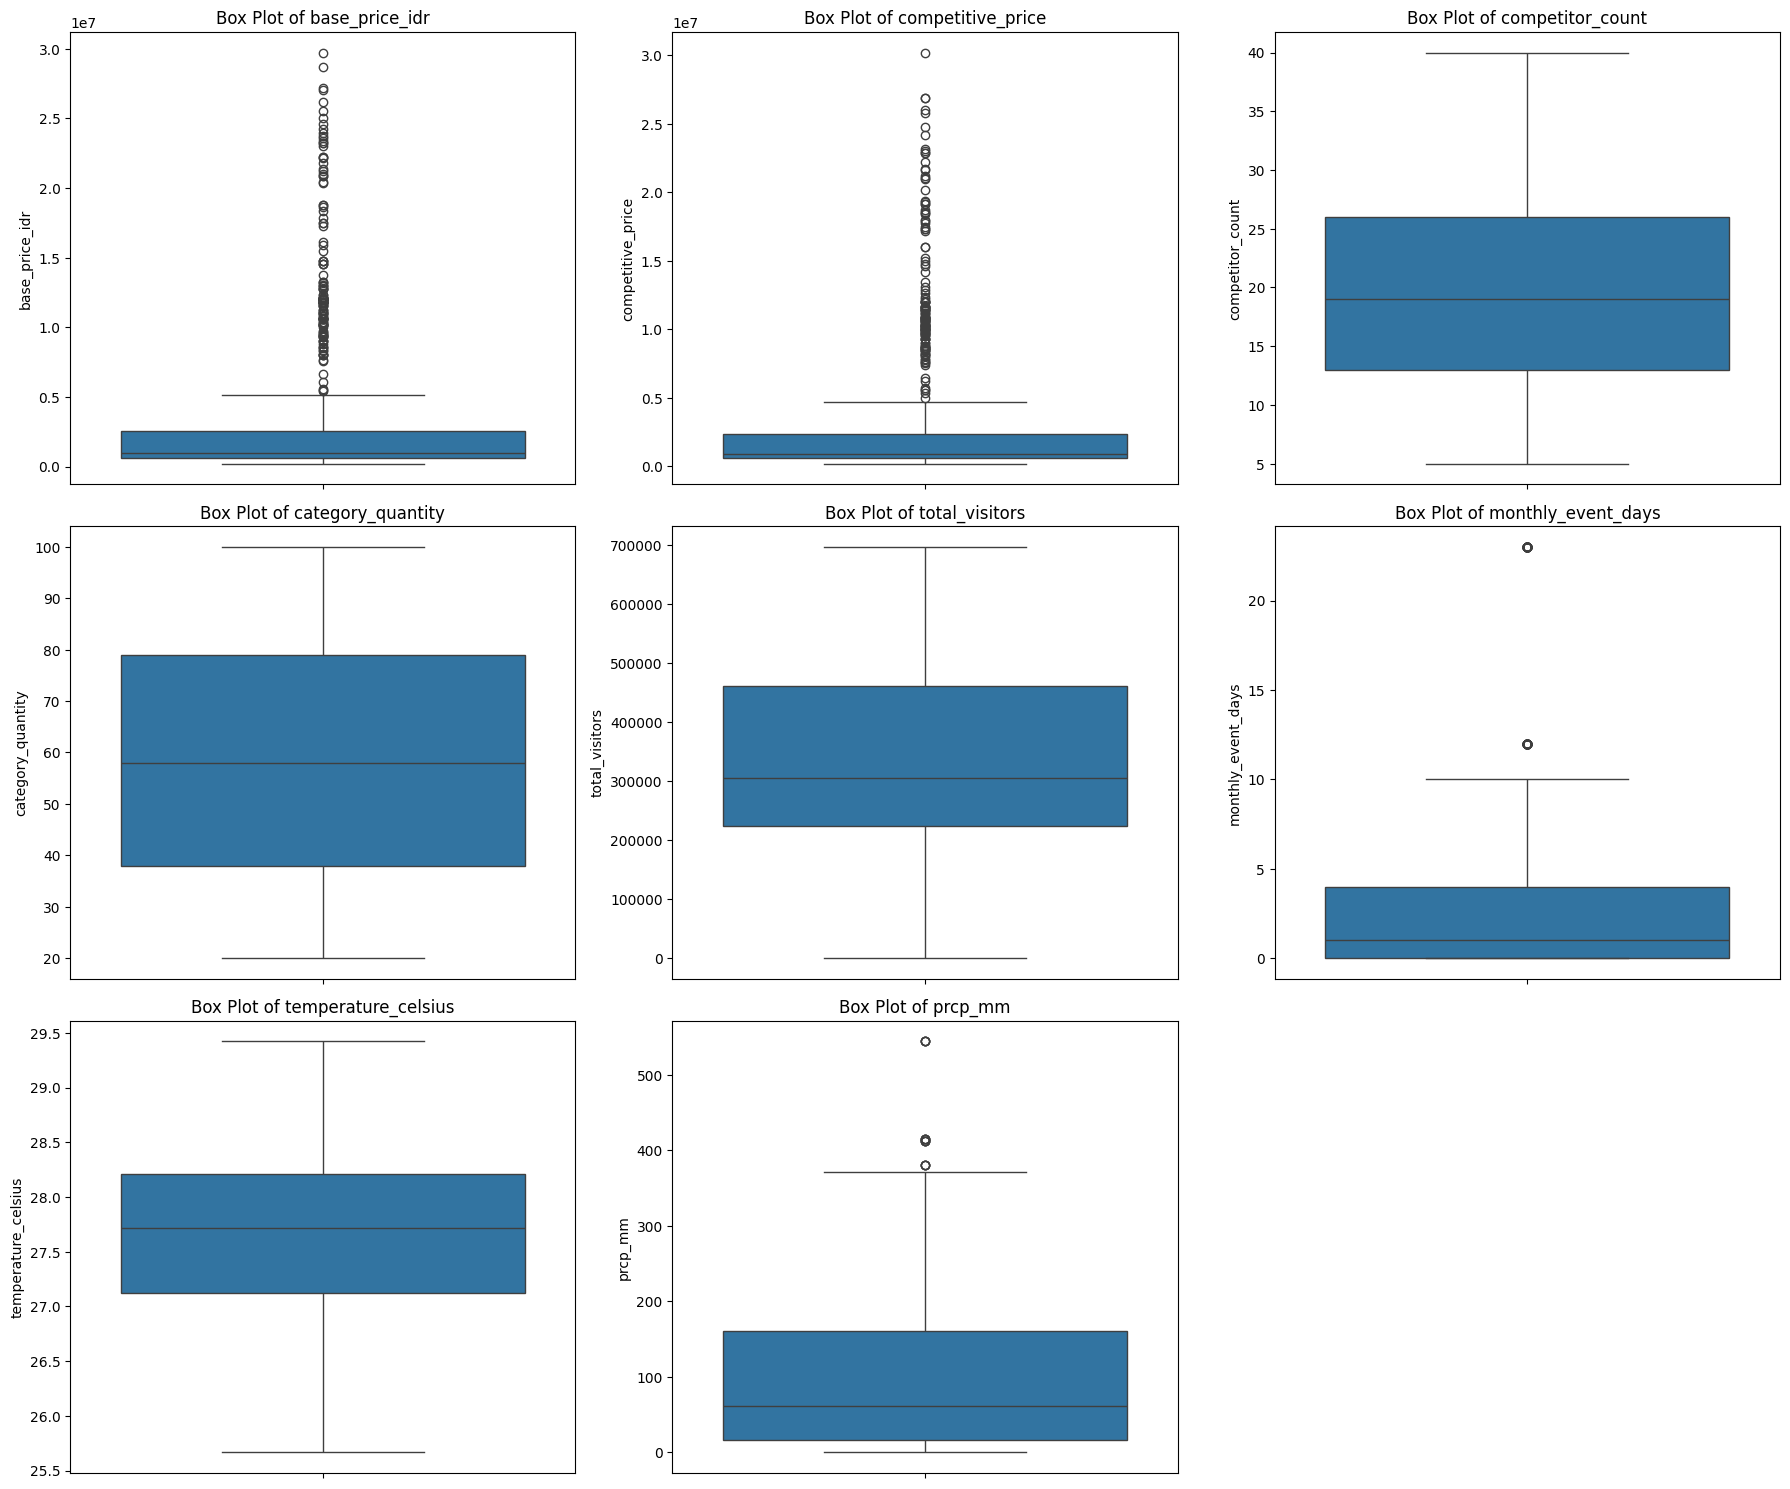

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_raw is available
if 'df_raw' not in locals() or df_raw is None or df_raw.empty:
    print("Error: df_raw DataFrame is not available or is empty. Cannot proceed with plotting.")
    raise NameError("df_raw is not available")

print("Generating box plots for numerical columns to visualize outliers...")

# Select only numerical columns for box plots
numerical_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of columns and rows for the subplots
n_cols = 3  # You can adjust the number of columns
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 5)) # Adjust figure size as needed

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_raw[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Generating histograms for columns: ['base_price_idr', 'competitive_price', 'prcp_mm', 'total_visitors']...


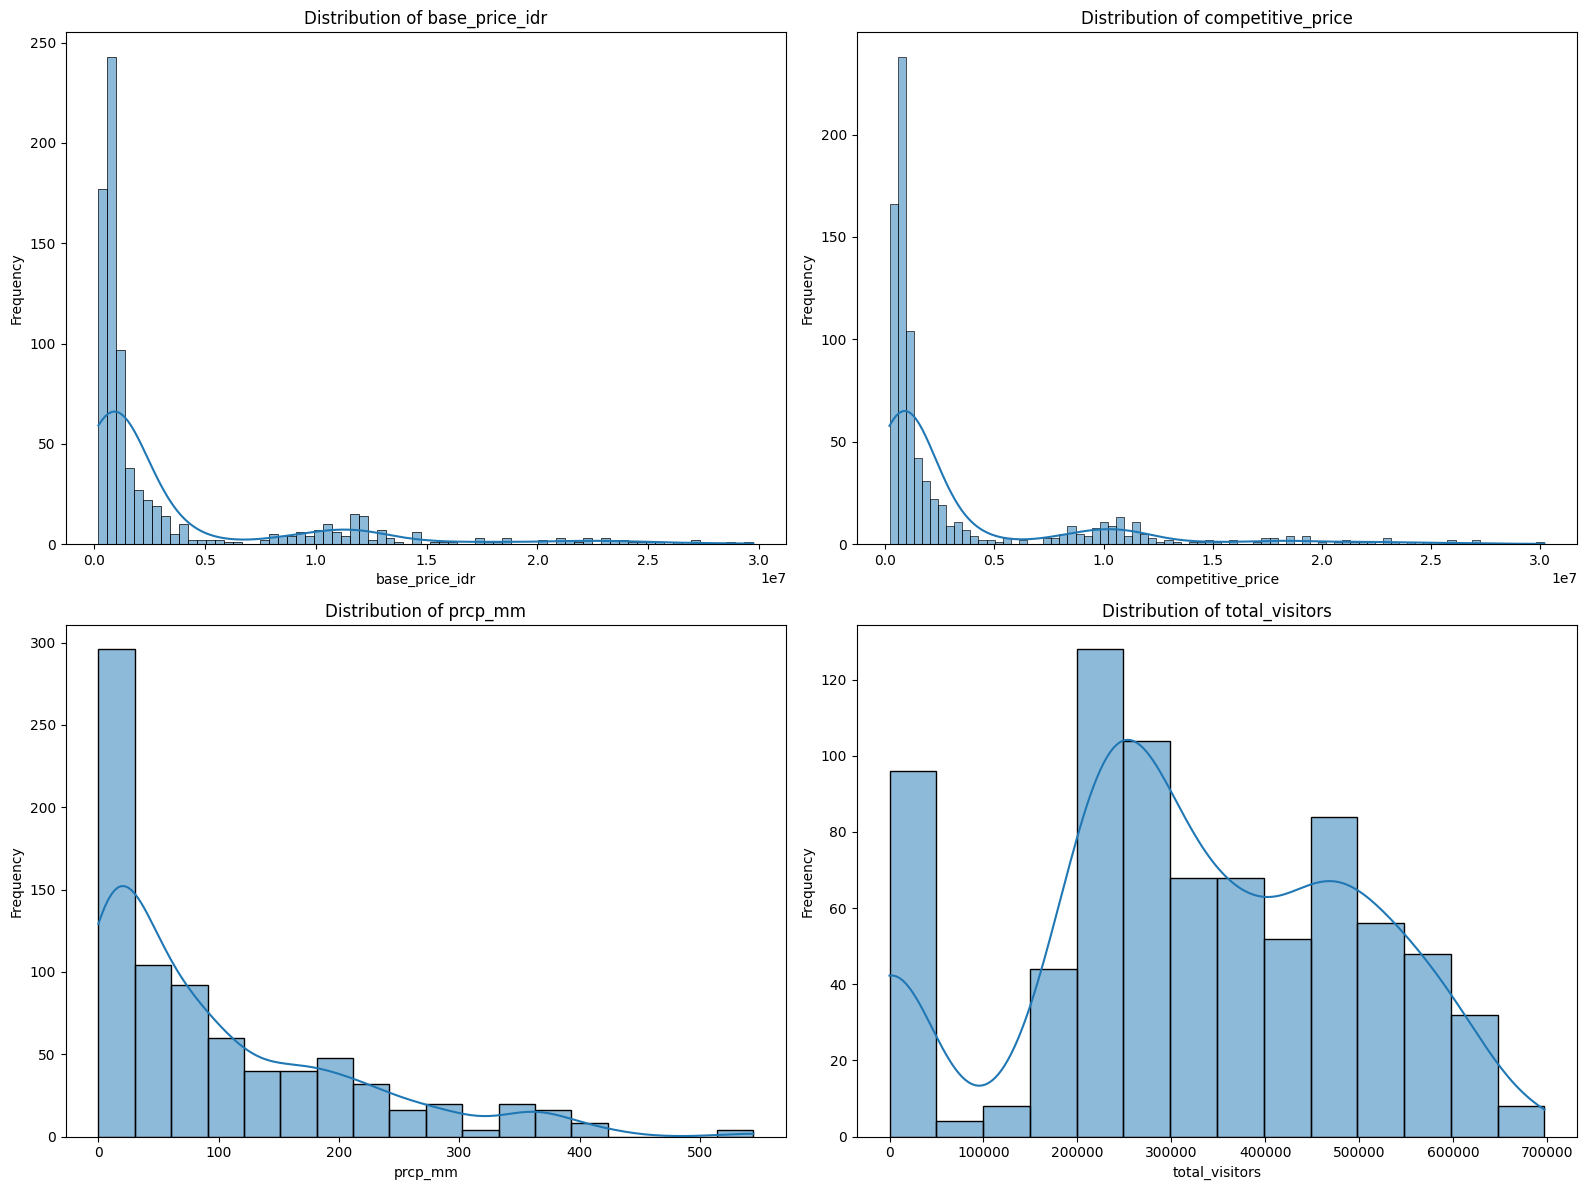

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_raw is available
if 'df_raw' not in locals() or df_raw is None or df_raw.empty:
    print("Error: df_raw DataFrame is not available or is empty. Cannot proceed with plotting.")
    raise NameError("df_raw is not available")

columns_to_plot = ['base_price_idr', 'competitive_price', 'prcp_mm', 'total_visitors']
existing_columns = [col for col in columns_to_plot if col in df_raw.columns]

if not existing_columns:
    print(f"None of the requested columns {columns_to_plot} found in the DataFrame. Cannot proceed with plotting.")
    print("Available columns:", df_raw.columns.tolist())
else:
    print(f"Generating histograms for columns: {existing_columns}...")

    n_cols = 2 # Number of columns for subplots
    n_rows = (len(existing_columns) + n_cols - 1) // n_cols # Calculate number of rows

    plt.figure(figsize=(n_cols * 8, n_rows * 6)) # Adjust figure size

    for i, col in enumerate(existing_columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(data=df_raw, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [ ]:
from matplotlib.cbook import boxplot_stats
boxplot_stats(df_raw['prcp_mm'])

[{'mean': np.float64(98.85773574130788),
  'iqr': np.float64(144.14613249864888),
  'cilo': np.float64(53.27512094127978),
  'cihi': np.float64(69.27761406142243),
  'whishi': np.float64(370.8141470005404),
  'whislo': np.float64(0.0),
  'fliers': array([380.948294, 380.948294, 380.948294, 380.948294, 415.010147,
         415.010147, 415.010147, 415.010147, 411.936294, 411.936294,
         411.936294, 411.936294, 544.244441, 544.244441, 544.244441,
         544.244441]),
  'q1': np.float64(16.323698252567105),
  'med': np.float64(61.2763675013511),
  'q3': np.float64(160.469830751216)}]

In [ ]:
filter = (df_raw['prcp_mm'] >= 370.8141470005404) | (df_raw['prcp_mm'] <= 0.0)
raw_df_filtered = df_raw.loc[-filter]

<Axes: xlabel='prcp_mm'>

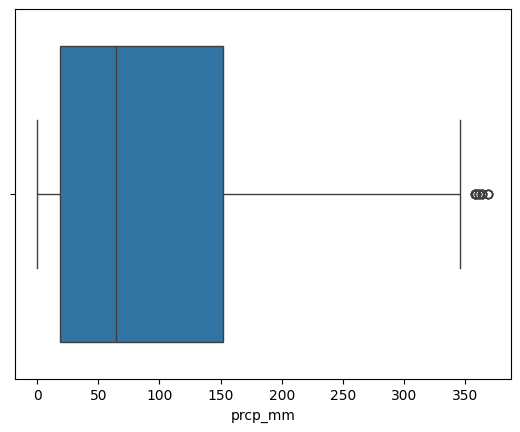

In [ ]:
import seaborn as sns
sns.boxplot(x = 'prcp_mm', data = raw_df_filtered)

In [ ]:
raw_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 740 non-null    object 
 1   base_price_idr       740 non-null    int64  
 2   category             740 non-null    object 
 3   competitive_price    740 non-null    int64  
 4   competitor_count     740 non-null    int64  
 5   category_quantity    740 non-null    int64  
 6   total_visitors       740 non-null    int64  
 7   monthly_event_days   740 non-null    float64
 8   temperature_celsius  740 non-null    float64
 9   prcp_mm              740 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 63.6+ KB


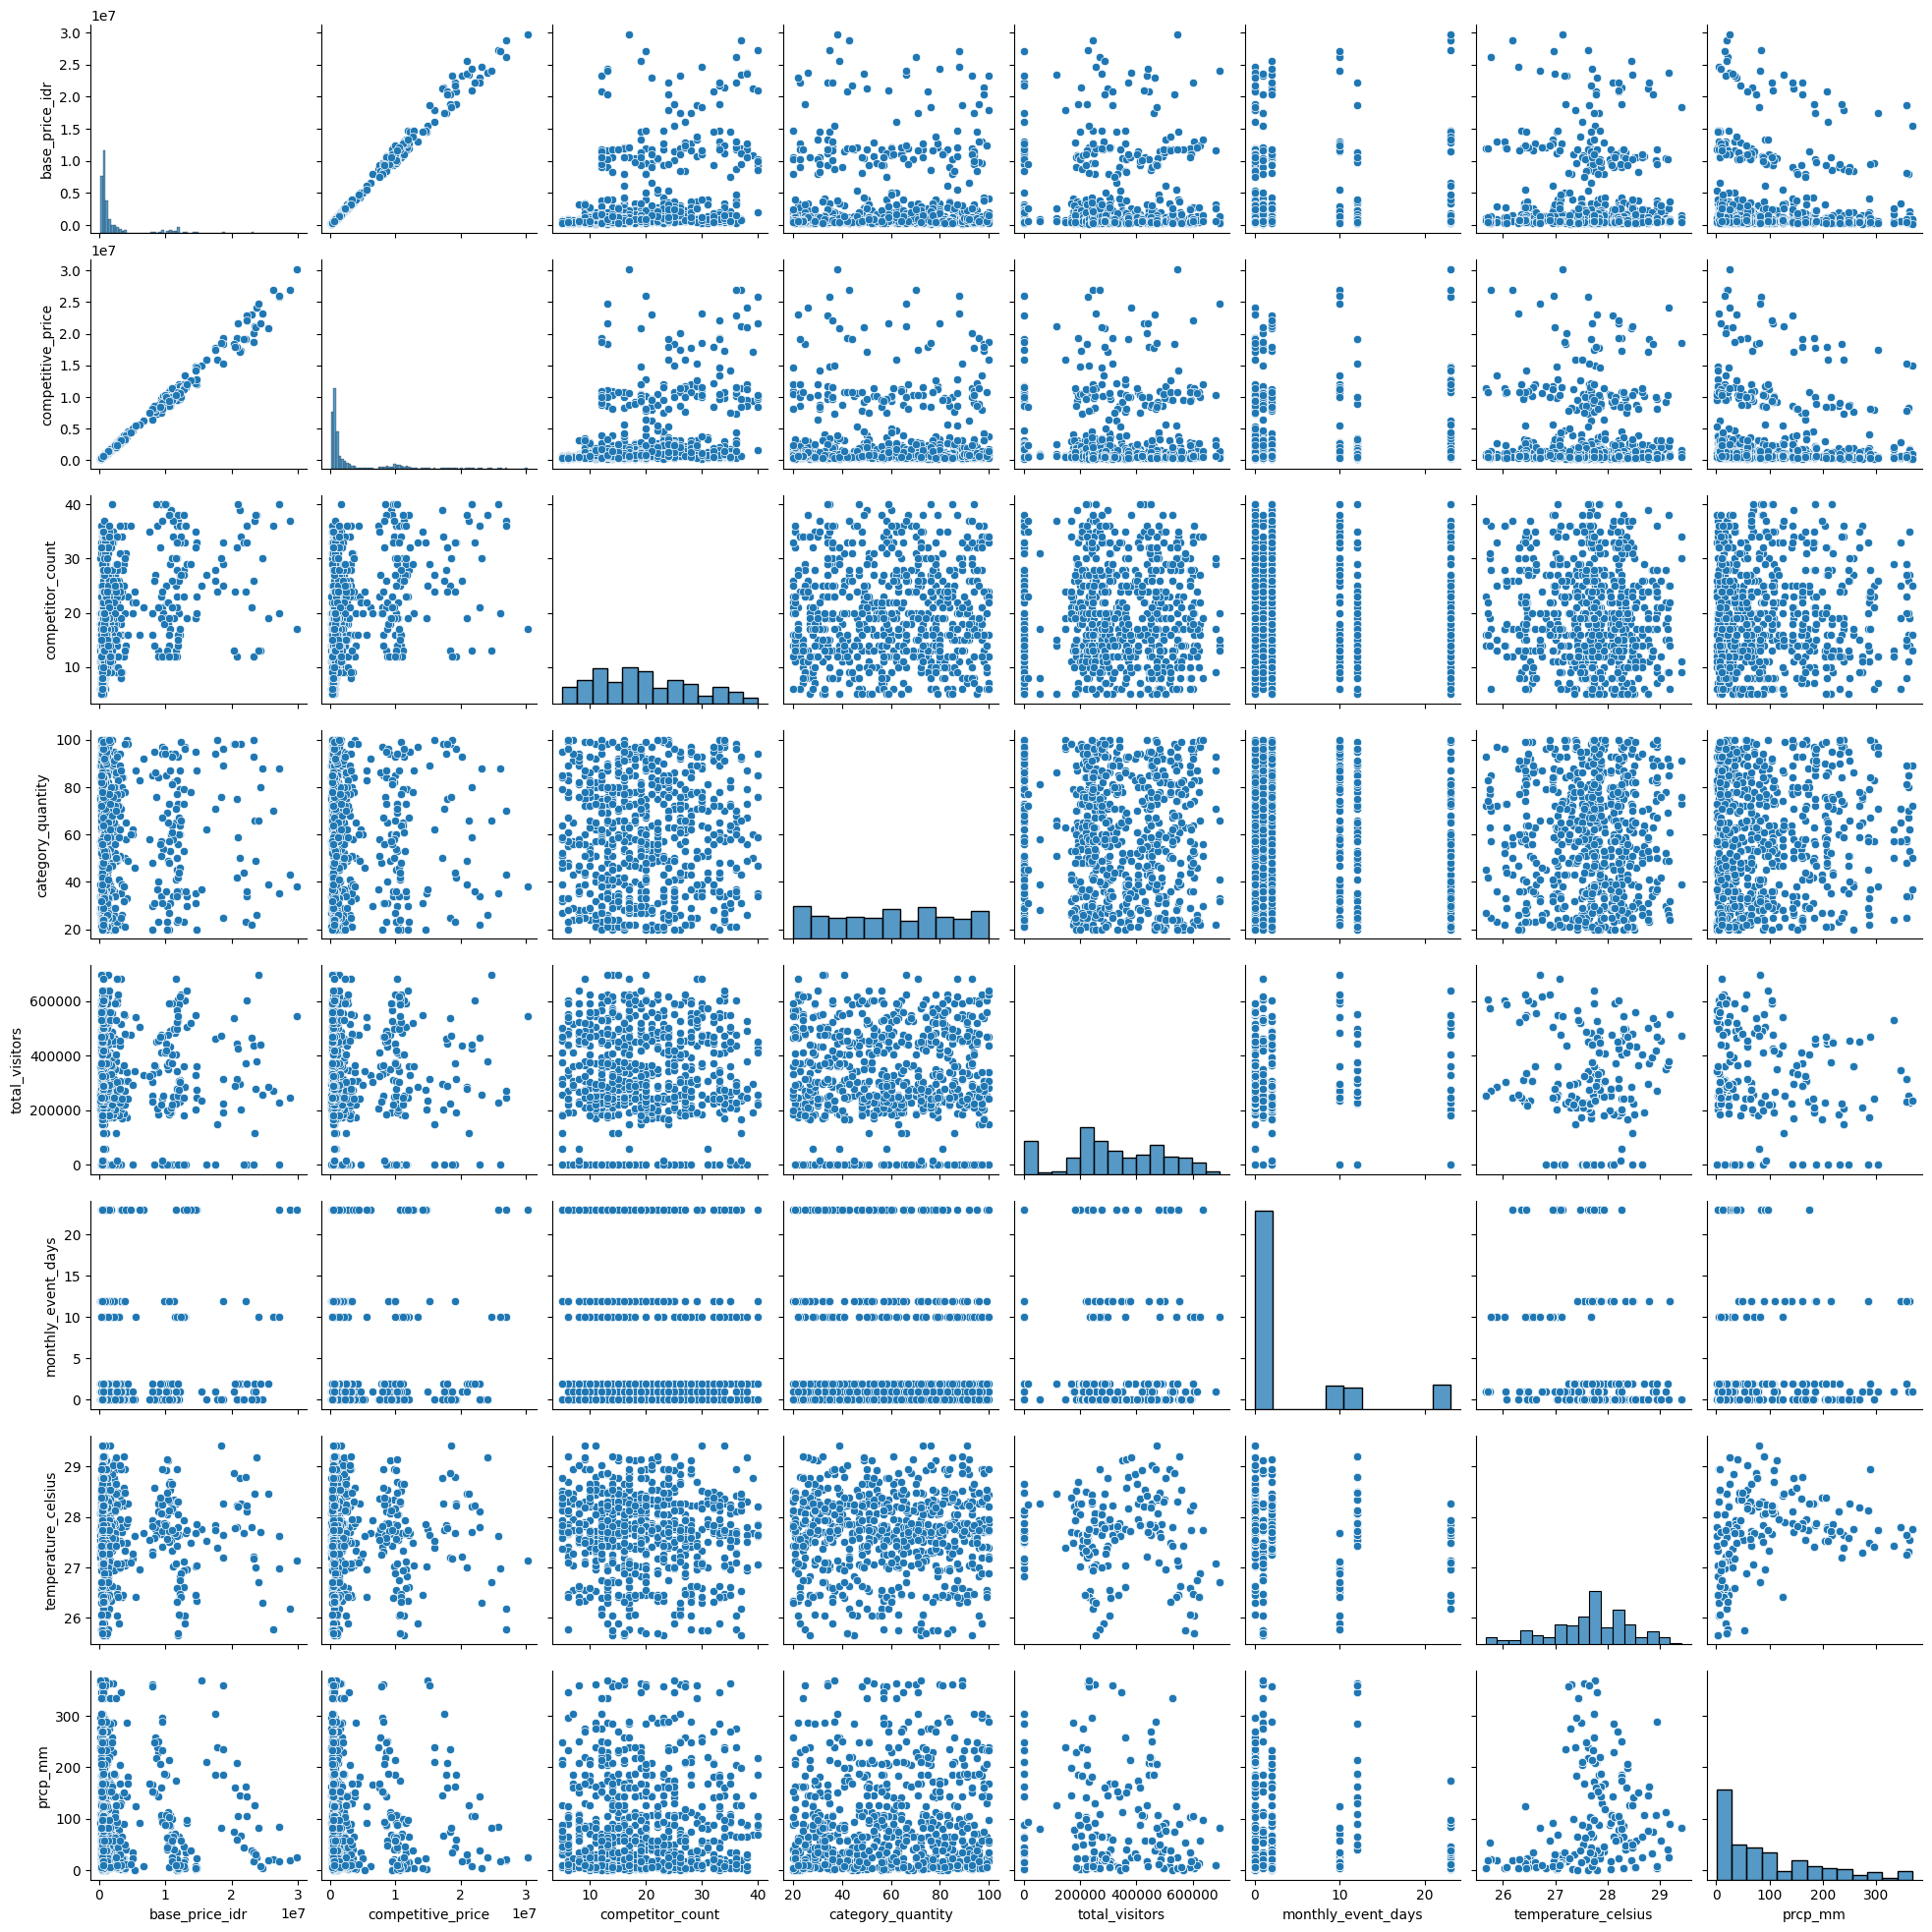

In [ ]:
sns.pairplot(raw_df_filtered)

In [ ]:
# Ensure raw_df_filtered is available
if 'raw_df_filtered' not in locals() or raw_df_filtered is None or raw_df_filtered.empty:
    print("Error: raw_df_filtered DataFrame is not available or is empty. Cannot save to CSV.")
    raise NameError("raw_df_filtered is not available")

# Save the raw_df_filtered dataframe to a CSV file
raw_df_filtered.to_csv('dataset_preprocessed.csv', index=False)

print("DataFrame saved to 'dataset_preprocessed.csv'. You can download it from the file explorer.")

DataFrame saved to 'dataset_preprocessed.csv'. You can download it from the file explorer.


## Transformation

### normalized and standardized

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Ensure raw_df_filtered is available
if 'raw_df_filtered' not in locals() or raw_df_filtered is None or raw_df_filtered.empty:
    print("Error: raw_df_filtered DataFrame is not available or is empty. Cannot proceed with normalization.")
    raise NameError("raw_df_filtered is not available")

print("Applying Min-Max Normalization to numerical columns...")

# Select only numerical columns for normalization
numerical_cols = raw_df_filtered.select_dtypes(include=[np.number]).columns.tolist()

# Exclude the 'date' column if it's numeric (unlikely but as a safeguard) or other non-feature columns
if 'date' in numerical_cols:
    numerical_cols.remove('date')
if 'month_year' in numerical_cols: # Also check for month_year in case it was kept somehow
     numerical_cols.remove('month_year')


# If there are no numerical columns to normalize, print a message and stop
if not numerical_cols:
    print("No numerical columns found to normalize.")
else:
    print(f"Applying Min-Max Normalization to columns: {numerical_cols}")

    # Initialize MinMaxScaler
    min_max_scaler = MinMaxScaler()

    # Apply Min-Max Normalization
    raw_df_normalized = raw_df_filtered.copy() # Create a copy to avoid modifying the original filtered data
    raw_df_normalized[numerical_cols] = min_max_scaler.fit_transform(raw_df_normalized[numerical_cols])

    print("\nDataFrame after Min-Max Normalization:")
    display(raw_df_normalized.head())
    print("\nInfo for Normalized DataFrame:")
    raw_df_normalized.info()

Applying Min-Max Normalization to numerical columns...
Applying Min-Max Normalization to columns: ['base_price_idr', 'competitive_price', 'competitor_count', 'category_quantity', 'total_visitors', 'monthly_event_days', 'temperature_celsius', 'prcp_mm']

DataFrame after Min-Max Normalization:


date  base_price_idr         category  competitive_price  \
0  2009-01-01        0.132754           rental           0.127323   
1  2009-01-01        0.062946       experience           0.055825   
2  2009-01-01        0.043629    entertainment           0.037185   
3  2009-01-01        0.005692  in_room_service           0.006781   
4  2009-02-01        0.015350           rental           0.015331   

   competitor_count  category_quantity  total_visitors  monthly_event_days  \
0          0.514286             0.1625        0.250379            0.043478   
1          0.485714             0.7375        0.250379            0.043478   
2          0.228571             0.0250        0.250379            0.043478   
3          0.171429             0.0750        0.250379            0.043478   
4          0.342857             0.9500        0.211881            0.000000   

   temperature_celsius   prcp_mm  
0             0.486502  0.777998  
1             0.486502  0.777998  
2             0.486502  0.777998  
3             0.486502  0.777998  
4             0.457782  0.646426


Info for Normalized DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 740 non-null    object 
 1   base_price_idr       740 non-null    float64
 2   category             740 non-null    object 
 3   competitive_price    740 non-null    float64
 4   competitor_count     740 non-null    float64
 5   category_quantity    740 non-null    float64
 6   total_visitors       740 non-null    float64
 7   monthly_event_days   740 non-null    float64
 8   temperature_celsius  740 non-null    float64
 9   prcp_mm              740 non-null    float64
dtypes: float64(8), object(2)
memory usage: 63.6+ KB


Generating histograms for normalized numerical columns...


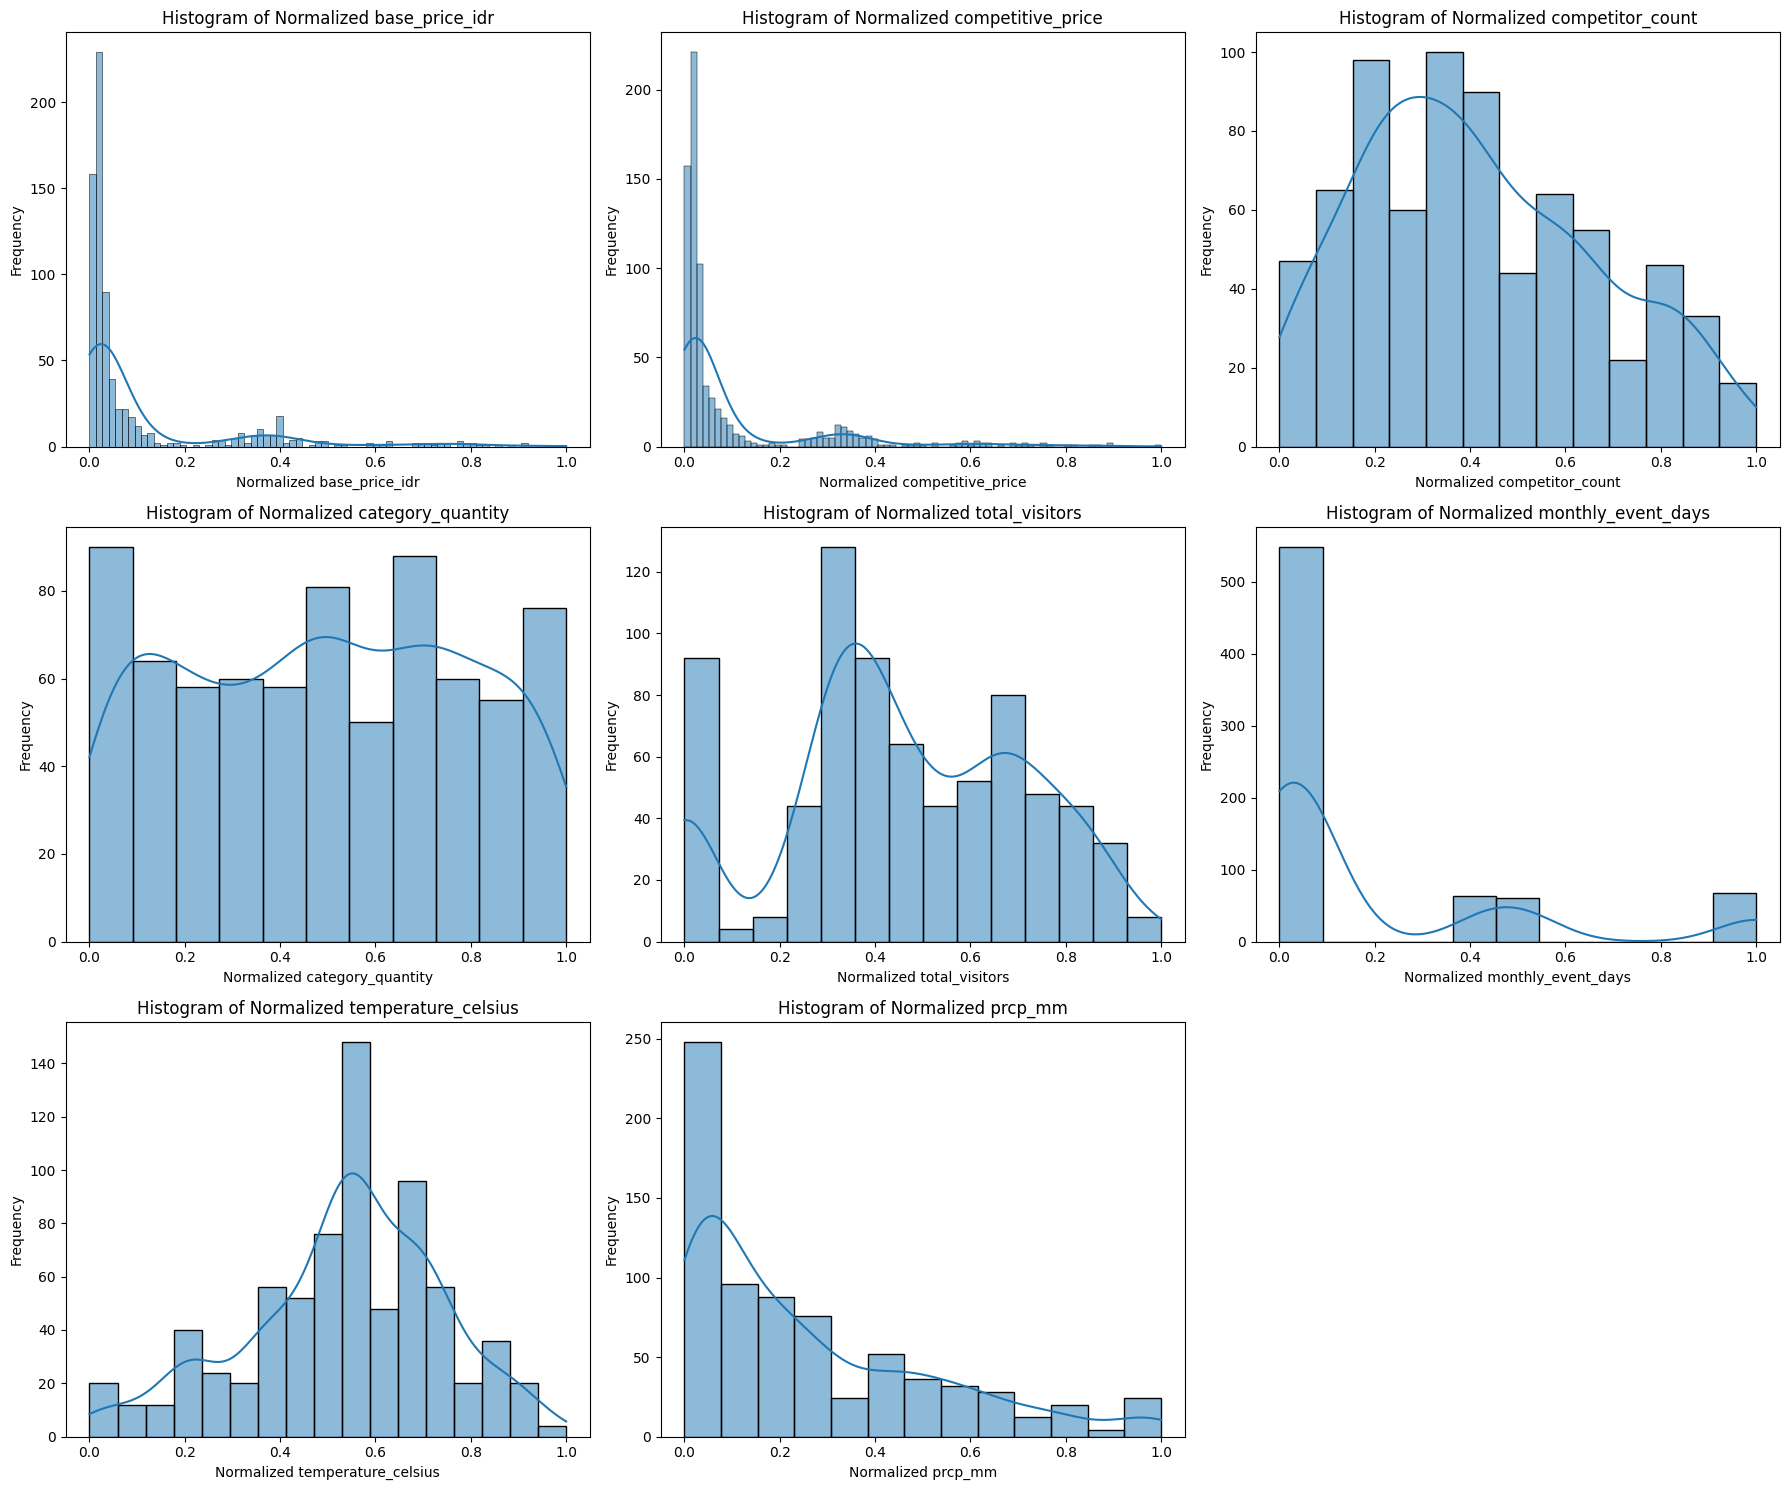

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure raw_df_normalized is available
if 'raw_df_normalized' not in locals() or raw_df_normalized is None or raw_df_normalized.empty:
    print("Error: raw_df_normalized DataFrame is not available or is empty. Cannot proceed with plotting.")
    raise NameError("raw_df_normalized is not available")

print("Generating histograms for normalized numerical columns...")

# Select only numerical columns for histograms
numerical_cols = raw_df_normalized.select_dtypes(include=[np.number]).columns

# Determine the number of columns and rows for the subplots
n_cols = 3  # You can adjust the number of columns
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 5)) # Adjust figure size as needed

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=raw_df_normalized, x=col, kde=True) # kde=True adds a kernel density estimate line
    plt.title(f'Histogram of Normalized {col}')
    plt.xlabel(f'Normalized {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Generating box plots for normalized numerical columns...


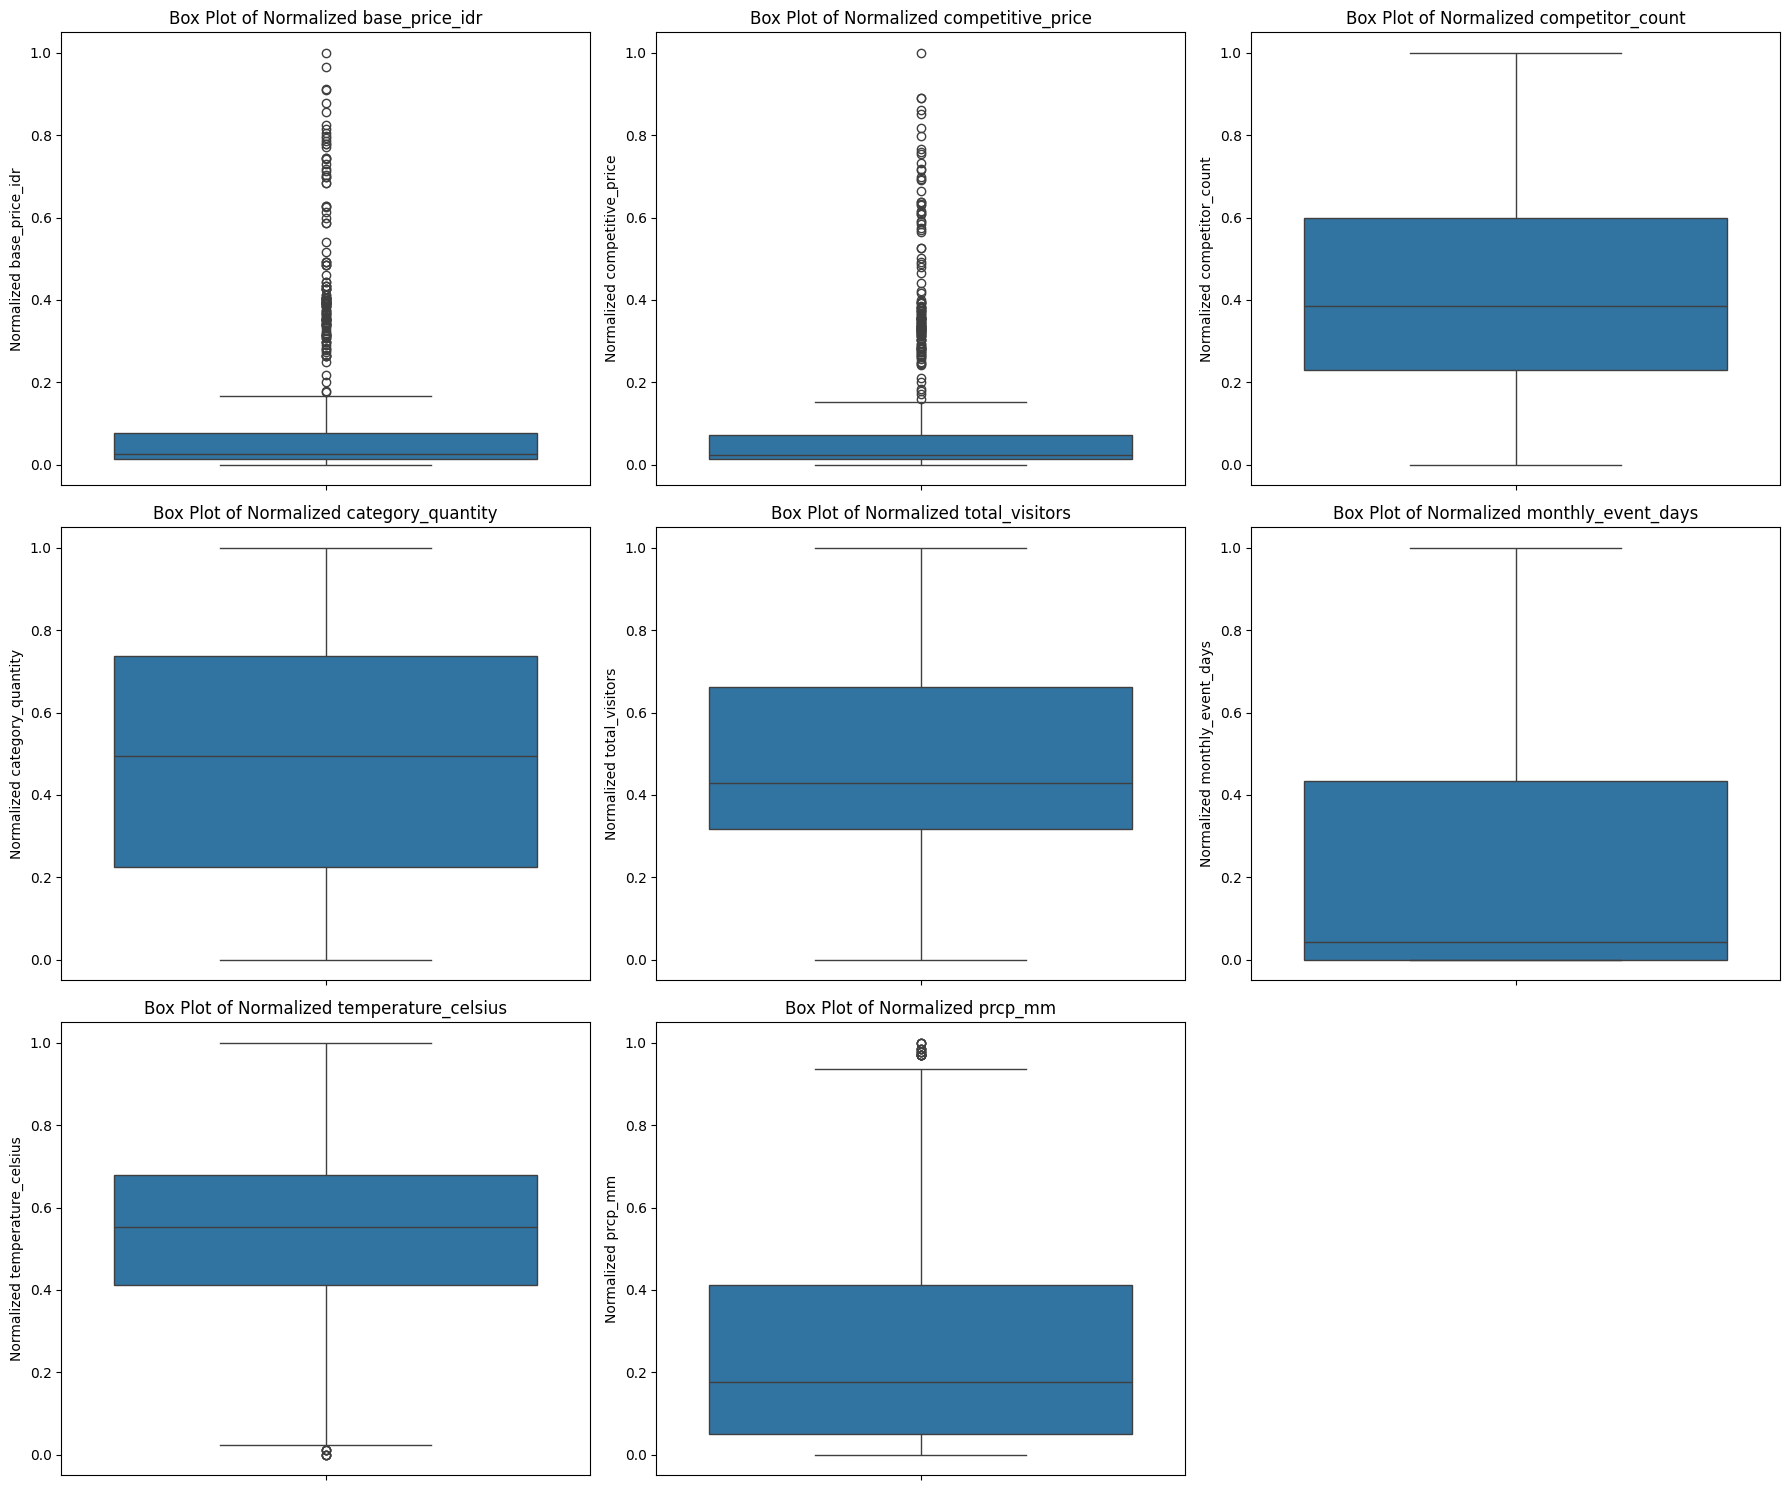

In [ ]:
# Save the normalized data to a CSV file
final_data_normalized.to_csv('final_data_normalized.csv', index=False)

print("DataFrame saved to 'final_data_normalized.csv'. You can download it from the file explorer.")

DataFrame saved to 'final_data_normalized.csv'. You can download it from the file explorer.


Feature Engineer

In [ ]:
import numpy as np

# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with feature engineering.")
    raise NameError("final_data_normalized is not available")

print("Applying feature engineering for Time & Seasonality...")

# Create sine and cosine transformations for the 'month' column
# Ensure 'month' column exists and is numeric
if 'month' not in final_data_normalized.columns or not pd.api.types.is_numeric_dtype(final_data_normalized['month']):
    print("Error: 'month' column not found or is not numeric.")
else:
    final_data_normalized['month_sin'] = np.sin(2 * np.pi * final_data_normalized['month'] / 12)
    final_data_normalized['month_cos'] = np.cos(2 * np.pi * final_data_normalized['month'] / 12)
    print("Created 'month_sin' and 'month_cos' features.")

# Drop one of the highly correlated season columns (is_High Season or is_Low Season)
# Assuming 'is_Low Season' is the one to drop to keep 'is_High Season' as the flag
columns_to_drop_season = ['is_Low Season']
existing_season_cols_to_drop = [col for col in columns_to_drop_season if col in final_data_normalized.columns]

if not existing_season_cols_to_drop:
    print(f"Columns {columns_to_drop_season} not found in the DataFrame. No season columns were dropped.")
    print("Available columns:", final_data_normalized.columns.tolist())
else:
    final_data_normalized = final_data_normalized.drop(columns=existing_season_cols_to_drop)
    print(f"Dropped columns: {existing_season_cols_to_drop}")


# Display the head and info of the updated DataFrame
print("\nDataFrame after Time & Seasonality Feature Engineering:")
display(final_data_normalized.head())
print("\nInfo for the updated DataFrame:")
final_data_normalized.info()

Applying feature engineering for Time & Seasonality...
Created 'month_sin' and 'month_cos' features.
Dropped columns: ['is_Low Season']

DataFrame after Time & Seasonality Feature Engineering:


total_visitors       date  monthly_event_days  average_temperature_celsius  \
0        0.250379 2009-01-01            0.043478                     0.486502   
1        0.250379 2009-01-01            0.043478                     0.486502   
2        0.250379 2009-01-01            0.043478                     0.486502   
3        0.250379 2009-01-01            0.043478                     0.486502   
4        0.211881 2009-02-01            0.000000                     0.457782   

   days_observed  rain_days  days_in_month  rain_days_percent   PRCP_mm  \
0             31   0.666667             31           0.656891  0.524715   
1             31   0.666667             31           0.656891  0.524715   
2             31   0.666667             31           0.656891  0.524715   
3             31   0.666667             31           0.656891  0.524715   
4             28   0.666667             28           0.727273  0.440114   

   month  ...  competitive_price  competitor_count  price_gap  is_High Season  \
0      1  ...           0.127323          0.514286   0.169862               0   
1      1  ...           0.055825          0.485714   0.185696               0   
2      1  ...           0.037185          0.228571   0.183663               0   
3      1  ...           0.006781          0.171429   0.144984               0   
4      2  ...           0.015331          0.342857   0.150306               0   

   is_entertainment  is_experience  is_in_room_service  is_rental  month_sin  \
0                 0              0                   0          1   0.500000   
1                 0              1                   0          0   0.500000   
2                 1              0                   0          0   0.500000   
3                 0              0                   1          0   0.500000   
4                 0              0                   0          1   0.866025   

   month_cos  
0   0.866025  
1   0.866025  
2   0.866025  
3   0.866025  
4   0.500000  

[5 rows x 21 columns]


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    float64       
 1   date                         800 non-null    datetime64[ns]
 2   monthly_event_days           800 non-null    float64       
 3   average_temperature_celsius  800 non-null    float64       
 4   days_observed                800 non-null    int64         
 5   rain_days                    800 non-null    float64       
 6   days_in_month                800 non-null    int32         
 7   rain_days_percent            800 non-null    float64       
 8   PRCP_mm                      800 non-null    float64       
 9   month                        800 non-null    int64         
 10  base_price_idr               800 non-null    float64       
 11  competitive_

In [ ]:
# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with feature engineering.")
    raise NameError("final_data_normalized is not available")

print("Applying feature engineering for Event Interactions...")

# Calculate event_rate: monthly_event_days / days_in_month
if 'monthly_event_days' in final_data_normalized.columns and 'days_in_month' in final_data_normalized.columns:
    # Add a small epsilon to avoid division by zero, though days_in_month should never be zero
    epsilon = 1e-9
    final_data_normalized['event_rate'] = final_data_normalized['monthly_event_days'] / (final_data_normalized['days_in_month'] + epsilon)
    print("Created 'event_rate' feature.")
else:
    print("Warning: 'monthly_event_days' or 'days_in_month' column not found. Skipping 'event_rate' creation.")

# Calculate event_high_interact: event_rate * is_High Season
# Check if both 'event_rate' and 'is_High Season' columns exist
if 'event_rate' in final_data_normalized.columns and 'is_High Season' in final_data_normalized.columns:
    final_data_normalized['event_high_interact'] = final_data_normalized['event_rate'] * final_data_normalized['is_High Season']
    print("Created 'event_high_interact' feature.")
elif 'event_rate' not in final_data_normalized.columns:
     print("Warning: 'event_rate' column not found. Skipping 'event_high_interact' creation.")
elif 'is_High Season' not in final_data_normalized.columns:
    print("Warning: 'is_High Season' column not found. Skipping 'event_high_interact' creation.")


# Display the head and info of the updated DataFrame
print("\nDataFrame after Event Interactions Feature Engineering:")
display(final_data_normalized.head())
print("\nInfo for the updated DataFrame:")
final_data_normalized.info()

Applying feature engineering for Event Interactions...
Created 'event_rate' feature.
Created 'event_high_interact' feature.

DataFrame after Event Interactions Feature Engineering:


total_visitors       date  monthly_event_days  average_temperature_celsius  \
0        0.250379 2009-01-01            0.043478                     0.486502   
1        0.250379 2009-01-01            0.043478                     0.486502   
2        0.250379 2009-01-01            0.043478                     0.486502   
3        0.250379 2009-01-01            0.043478                     0.486502   
4        0.211881 2009-02-01            0.000000                     0.457782   

   days_observed  rain_days  days_in_month  rain_days_percent   PRCP_mm  \
0             31   0.666667             31           0.656891  0.524715   
1             31   0.666667             31           0.656891  0.524715   
2             31   0.666667             31           0.656891  0.524715   
3             31   0.666667             31           0.656891  0.524715   
4             28   0.666667             28           0.727273  0.440114   

   month  ...  price_gap  is_High Season  is_entertainment  is_experience  \
0      1  ...   0.169862               0                 0              0   
1      1  ...   0.185696               0                 0              1   
2      1  ...   0.183663               0                 1              0   
3      1  ...   0.144984               0                 0              0   
4      2  ...   0.150306               0                 0              0   

   is_in_room_service  is_rental  month_sin  month_cos  event_rate  \
0                   0          1   0.500000   0.866025    0.001403   
1                   0          0   0.500000   0.866025    0.001403   
2                   0          0   0.500000   0.866025    0.001403   
3                   1          0   0.500000   0.866025    0.001403   
4                   0          1   0.866025   0.500000    0.000000   

   event_high_interact  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 23 columns]


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    float64       
 1   date                         800 non-null    datetime64[ns]
 2   monthly_event_days           800 non-null    float64       
 3   average_temperature_celsius  800 non-null    float64       
 4   days_observed                800 non-null    int64         
 5   rain_days                    800 non-null    float64       
 6   days_in_month                800 non-null    int32         
 7   rain_days_percent            800 non-null    float64       
 8   PRCP_mm                      800 non-null    float64       
 9   month                        800 non-null    int64         
 10  base_price_idr               800 non-null    float64       
 11  competitive_

In [ ]:
import numpy as np

# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with feature engineering.")
    raise NameError("final_data_normalized is not available")

print("Applying feature engineering for Price Interactions...")

# Calculate price_gap_pct: (base_price_idr - competitive_price) / (competitive_price + ε)
if 'base_price_idr' in final_data_normalized.columns and 'competitive_price' in final_data_normalized.columns:
    epsilon = 1e-9  # Small constant to avoid division by zero
    final_data_normalized['price_gap_pct'] = (final_data_normalized['base_price_idr'] - final_data_normalized['competitive_price']) / (final_data_normalized['competitive_price'] + epsilon)
    print("Created 'price_gap_pct' feature.")
else:
    print("Warning: 'base_price_idr' or 'competitive_price' column not found. Skipping 'price_gap_pct' creation.")

# Display the head and info of the updated DataFrame
print("\nDataFrame after Price Interactions Feature Engineering:")
display(final_data_normalized.head())
print("\nInfo for the updated DataFrame:")
final_data_normalized.info()

Applying feature engineering for Price Interactions...
Created 'price_gap_pct' feature.

DataFrame after Price Interactions Feature Engineering:


total_visitors       date  monthly_event_days  average_temperature_celsius  \
0        0.250379 2009-01-01            0.043478                     0.486502   
1        0.250379 2009-01-01            0.043478                     0.486502   
2        0.250379 2009-01-01            0.043478                     0.486502   
3        0.250379 2009-01-01            0.043478                     0.486502   
4        0.211881 2009-02-01            0.000000                     0.457782   

   days_observed  rain_days  days_in_month  rain_days_percent   PRCP_mm  \
0             31   0.666667             31           0.656891  0.524715   
1             31   0.666667             31           0.656891  0.524715   
2             31   0.666667             31           0.656891  0.524715   
3             31   0.666667             31           0.656891  0.524715   
4             28   0.666667             28           0.727273  0.440114   

   month  ...  is_High Season  is_entertainment  is_experience  \
0      1  ...               0                 0              0   
1      1  ...               0                 0              1   
2      1  ...               0                 1              0   
3      1  ...               0                 0              0   
4      2  ...               0                 0              0   

   is_in_room_service  is_rental  month_sin  month_cos  event_rate  \
0                   0          1   0.500000   0.866025    0.001403   
1                   0          0   0.500000   0.866025    0.001403   
2                   0          0   0.500000   0.866025    0.001403   
3                   1          0   0.500000   0.866025    0.001403   
4                   0          1   0.866025   0.500000    0.000000   

   event_high_interact  price_gap_pct  
0                  0.0       0.042651  
1                  0.0       0.127576  
2                  0.0       0.173275  
3                  0.0      -0.160596  
4                  0.0       0.001294  

[5 rows x 24 columns]


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    float64       
 1   date                         800 non-null    datetime64[ns]
 2   monthly_event_days           800 non-null    float64       
 3   average_temperature_celsius  800 non-null    float64       
 4   days_observed                800 non-null    int64         
 5   rain_days                    800 non-null    float64       
 6   days_in_month                800 non-null    int32         
 7   rain_days_percent            800 non-null    float64       
 8   PRCP_mm                      800 non-null    float64       
 9   month                        800 non-null    int64         
 10  base_price_idr               800 non-null    float64       
 11  competitive_

In [ ]:
import numpy as np

# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with feature engineering.")
    raise NameError("final_data_normalized is not available")

print("Applying feature engineering for Lagged and Rolling Features per Category...")

# Determine the category for each row
# Assuming the 'is_' columns represent the categories and are binary (0 or 1)
category_cols = ['is_entertainment', 'is_experience', 'is_in_room_service', 'is_rental']

# Check if category columns exist
if not all(col in final_data_normalized.columns for col in category_cols):
    print("Error: One or more category columns not found in the DataFrame.")
    print("Available columns:", final_data_normalized.columns.tolist())
else:
    # Find the category with the maximum value (which should be 1 for the active category)
    final_data_normalized['category'] = final_data_normalized[category_cols].idxmax(axis=1).str.replace('is_', '')
    print("Created 'category' column.")

    # Sort by category and date to ensure correct lagging and rolling calculations
    final_data_normalized = final_data_normalized.sort_values(by=['category', 'date'])

    # Apply feature engineering per category
    grouped = final_data_normalized.groupby('category')

    # Lagged features
    final_data_normalized['visitors_lag1'] = grouped['total_visitors'].shift(1)
    final_data_normalized['visitors_lag3'] = grouped['total_visitors'].shift(3)
    final_data_normalized['competitive_price_lag1'] = grouped['competitive_price'].shift(1)
    final_data_normalized['competitor_count_lag1'] = grouped['competitor_count'].shift(1)
    final_data_normalized['price_gap_lag1'] = grouped['price_gap'].shift(1) # Added this line
    print("Created lagged features.")

    # Rolling features (window size 3)
    final_data_normalized['visitors_roll3_mean'] = grouped['total_visitors'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
    final_data_normalized['visitors_roll3_std'] = grouped['total_visitors'].rolling(window=3, min_periods=1).std().reset_index(level=0, drop=True)
    final_data_normalized['price_gap_roll3_mean'] = grouped['price_gap'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
    print("Created rolling features.")

    # Momentum features
    epsilon = 1e-9  # Small constant to avoid division by zero
    final_data_normalized['visitors_mom'] = (final_data_normalized['total_visitors'] - final_data_normalized['visitors_lag1']) / (final_data_normalized['visitors_lag1'] + epsilon)
    final_data_normalized['price_gap_mom'] = final_data_normalized['price_gap'] - final_data_normalized['price_gap_lag1']
    print("Created momentum features.")


    # Display the head and info of the updated DataFrame
    print("\nDataFrame after Lagged and Rolling Feature Engineering per Category:")
    display(final_data_normalized.head())
    print("\nInfo for the updated DataFrame:")
    final_data_normalized.info()

Applying feature engineering for Lagged and Rolling Features per Category...
Created 'category' column.
Created lagged features.
Created rolling features.
Created momentum features.

DataFrame after Lagged and Rolling Feature Engineering per Category:


total_visitors       date  monthly_event_days  \
2         0.250379 2009-01-01            0.043478   
6         0.211881 2009-02-01            0.000000   
10        0.241290 2009-03-01            0.086957   
14        0.270799 2009-04-01            0.000000   
18        0.273707 2009-05-01            0.086957   

    average_temperature_celsius  days_observed  rain_days  days_in_month  \
2                      0.486502             31   0.666667             31   
6                      0.457782             28   0.666667             28   
10                     0.539922             31   0.416667             31   
14                     0.680133             30   0.166667             30   
18                     0.537203             30   0.291667             31   

    rain_days_percent   PRCP_mm  month  ...  visitors_lag1  visitors_lag3  \
2            0.656891  0.524715      1  ...            NaN            NaN   
6            0.727273  0.440114      2  ...       0.250379            NaN   
10           0.410557  0.271388      3  ...       0.211881            NaN   
14           0.169697  0.023764      4  ...       0.241290       0.250379   
18           0.296970  0.122624      5  ...       0.270799       0.211881   

    competitive_price_lag1  competitor_count_lag1  price_gap_lag1  \
2                      NaN                    NaN             NaN   
6                 0.037185               0.228571        0.183663   
10                0.525997               0.542857        0.499275   
14                0.094039               0.828571        0.224133   
18                0.099797               0.685714        0.250839   

    visitors_roll3_mean  visitors_roll3_std  price_gap_roll3_mean  \
2              0.250379                 NaN              0.183663   
6              0.231130            0.027222              0.341469   
10             0.234517            0.020123              0.302357   
14             0.241324            0.029459              0.324749   
18             0.261932            0.017935              0.300501   

    visitors_mom  price_gap_mom  
2            NaN            NaN  
6      -0.153758       0.315612  
10      0.138798      -0.275142  
14      0.122297       0.026706  
18      0.010738       0.175693  

[5 rows x 35 columns]


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 2 to 796
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_visitors               800 non-null    float64       
 1   date                         800 non-null    datetime64[ns]
 2   monthly_event_days           800 non-null    float64       
 3   average_temperature_celsius  800 non-null    float64       
 4   days_observed                800 non-null    int64         
 5   rain_days                    800 non-null    float64       
 6   days_in_month                800 non-null    int32         
 7   rain_days_percent            800 non-null    float64       
 8   PRCP_mm                      800 non-null    float64       
 9   month                        800 non-null    int64         
 10  base_price_idr               800 non-null    float64       
 11  competitive_price

Visualizing Lagged Competitive Price per Category:


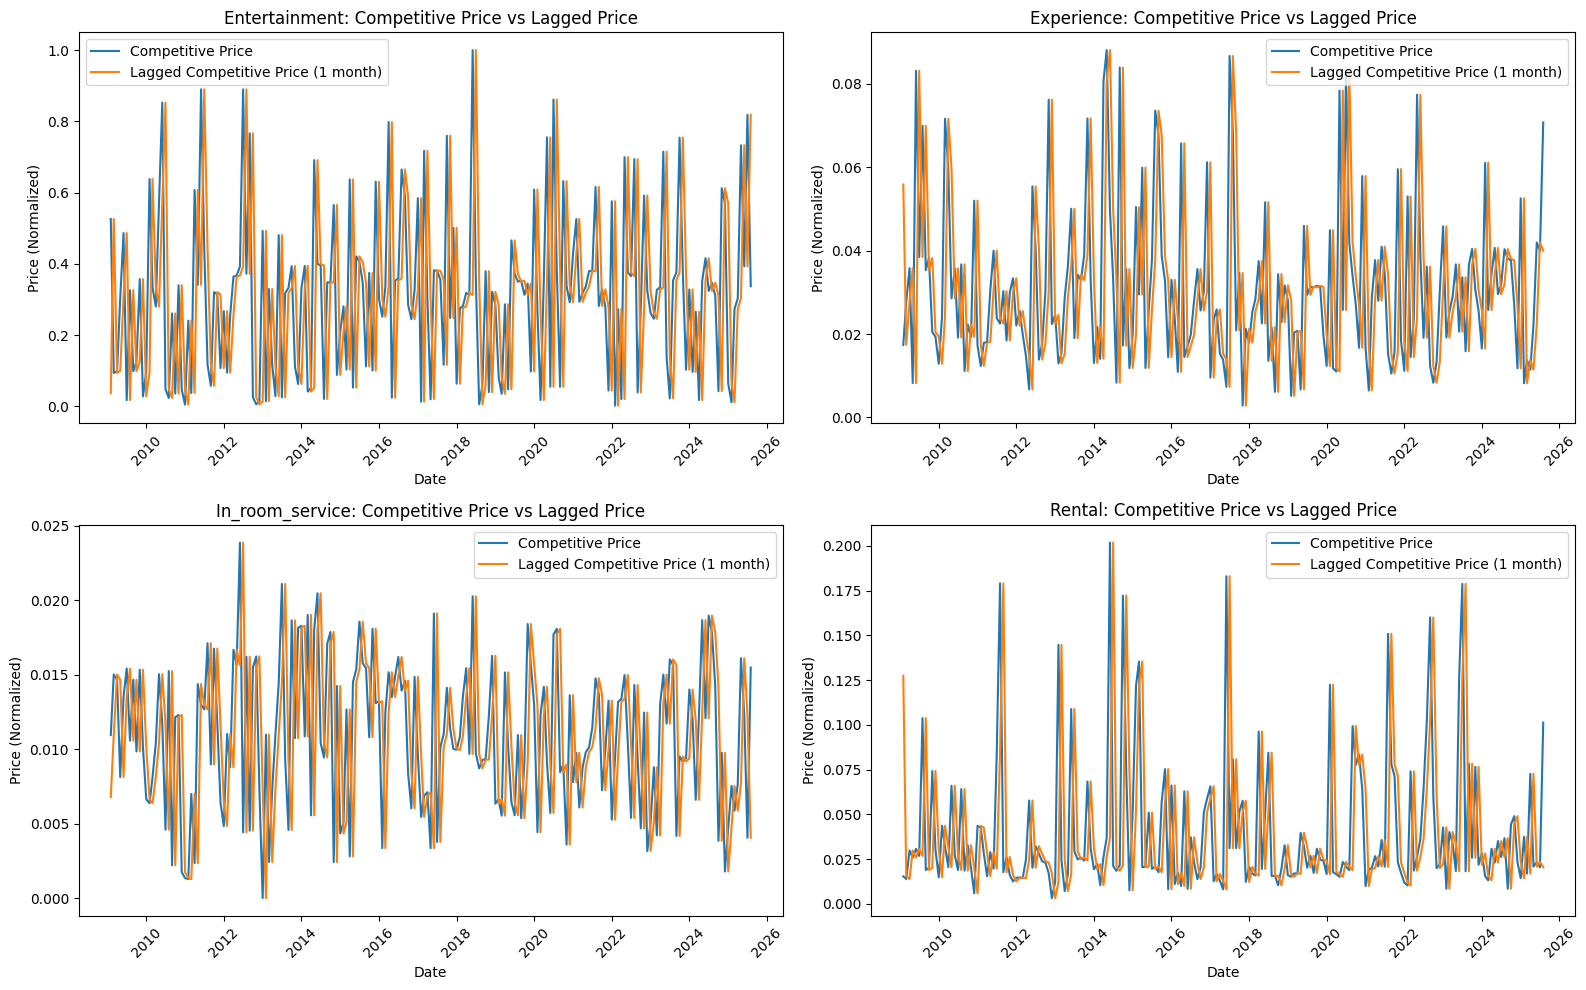

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with visualization.")
    raise NameError("final_data_normalized is not available")

# Ensure the 'category' and lagged price columns exist
required_cols = ['date', 'category', 'competitive_price', 'competitive_price_lag1']
if not all(col in final_data_normalized.columns for col in required_cols):
    print(f"Error: One or more required columns not found in the DataFrame: {required_cols}")
    print("Available columns:", final_data_normalized.columns.tolist())
else:
    print("Visualizing Lagged Competitive Price per Category:")

    # Get unique categories
    categories = final_data_normalized['category'].unique()

    # Determine grid size for subplots
    n_cols = 2
    n_rows = (len(categories) + n_cols - 1) // n_cols

    plt.figure(figsize=(n_cols * 8, n_rows * 5)) # Adjust figure size

    for i, category in enumerate(categories):
        plt.subplot(n_rows, n_cols, i + 1)
        category_df = final_data_normalized[final_data_normalized['category'] == category].dropna(subset=['competitive_price_lag1']) # Drop rows where lag is NaN
        sns.lineplot(data=category_df, x='date', y='competitive_price', label='Competitive Price')
        sns.lineplot(data=category_df, x='date', y='competitive_price_lag1', label='Lagged Competitive Price (1 month)')
        plt.title(f'{category.capitalize()}: Competitive Price vs Lagged Price')
        plt.xlabel('Date')
        plt.ylabel('Price (Normalized)')
        plt.legend()
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

### Feature Selection

Generating pairplot for selected features...
Using 'is_High Season' as hue for the pairplot.


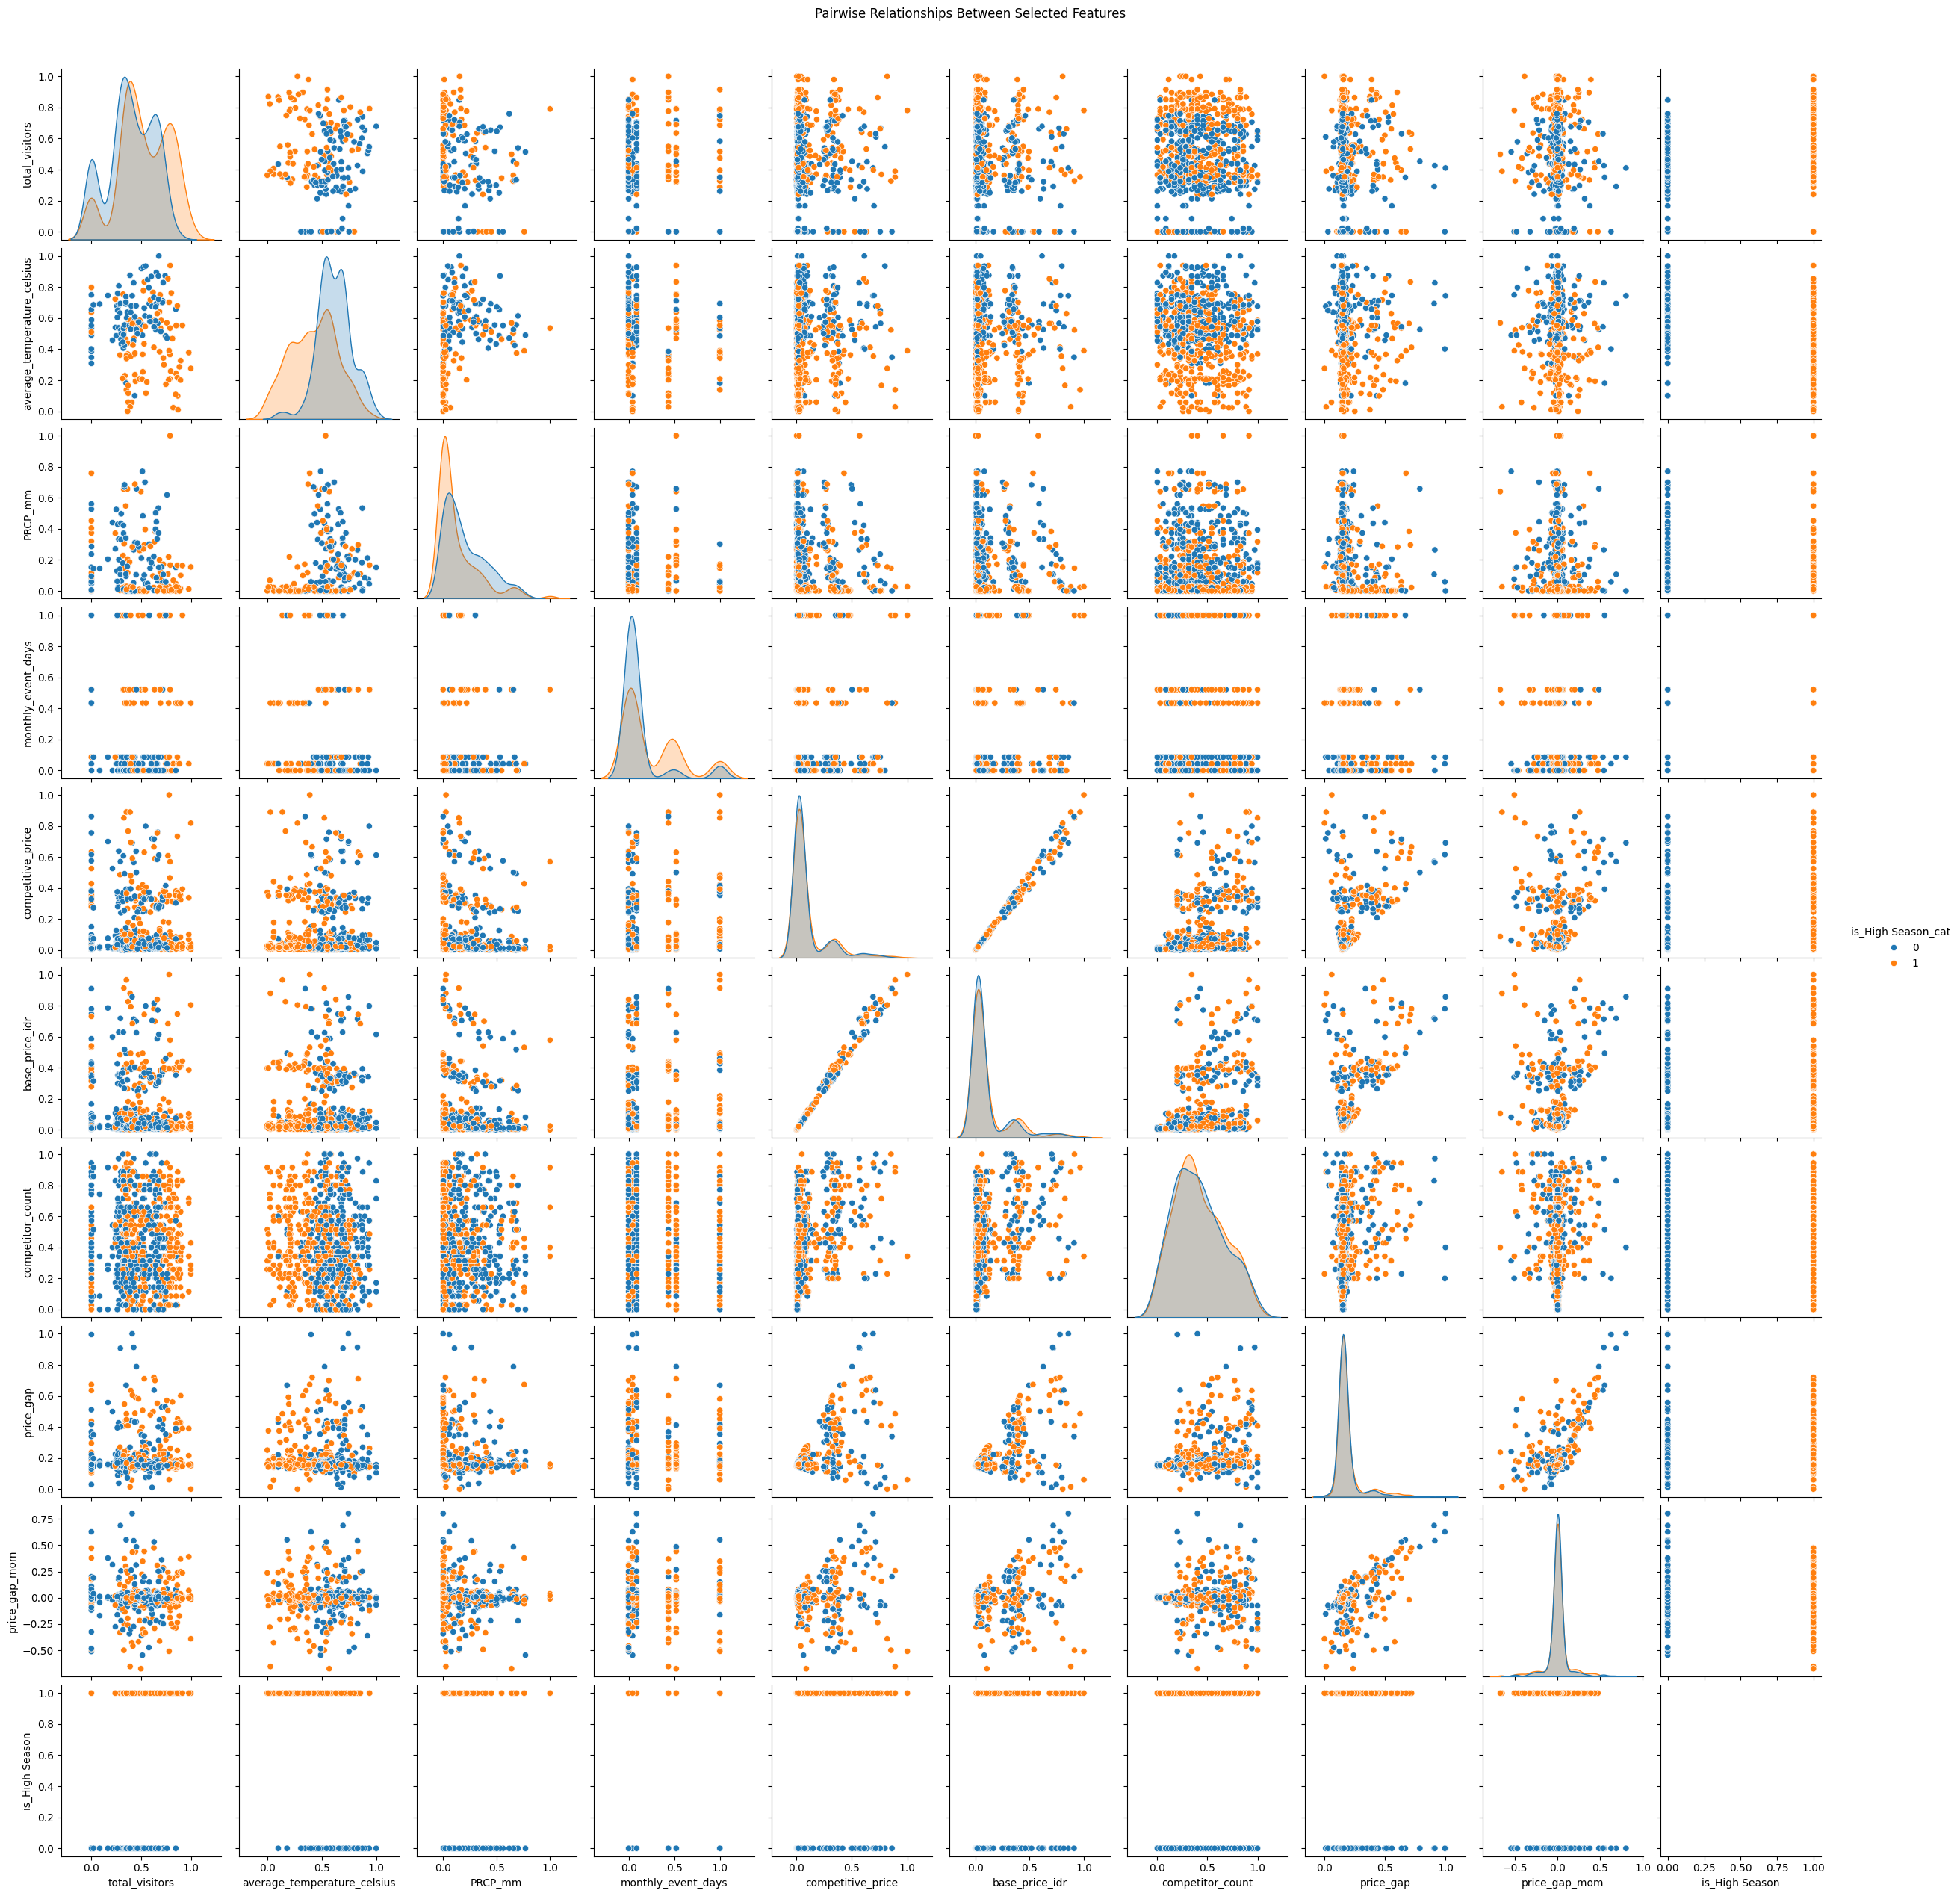

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with pairplot.")
    raise NameError("final_data_normalized is not available")

print("Generating pairplot for selected features...")

# Select a few relevant numerical columns for the pairplot
# Include the target variable 'total_visitors' and some engineered/original features
selected_features = [
    'total_visitors',
    'average_temperature_celsius',
    'PRCP_mm',
    'monthly_event_days',
    'competitive_price',
    'base_price_idr',
    'competitor_count',
    'price_gap',
    'visitors_lag1'
    'visitors_lag3',
    'price_gap_mom' # Example engineered feature
]

# Filter out columns that might not exist in the current state of final_data_normalized
existing_features = [col for col in selected_features if col in final_data_normalized.columns]

if not existing_features:
    print("No suitable features found for pairplot after selecting relevant columns.")
else:
    # Generate the pairplot
    # We won't use 'hue' with a continuous variable like total_visitors,
    # but you could add 'season_annual_median' as hue if you want to see
    # how relationships differ by season (ensure it's in existing_features and not dropped)

    # Check if 'is_High Season' exists to potentially use as hue (categorical)
    if 'is_High Season' in final_data_normalized.columns:
         print("Using 'is_High Season' as hue for the pairplot.")
         # Add 'is_High Season' to the list of features if it's not already there and relevant
         features_for_pairplot = [f for f in existing_features if f != 'is_High Season'] + ['is_High Season']
         # Ensure the hue column is treated categorically by seaborn if it's int/float
         final_data_normalized['is_High Season_cat'] = final_data_normalized['is_High Season'].astype(str)
         # Call pairplot with the temporary categorical column as hue
         sns.pairplot(data=final_data_normalized[features_for_pairplot + ['is_High Season_cat']], hue='is_High Season_cat')
         # Drop the temporary categorical column AFTER plotting
         final_data_normalized = final_data_normalized.drop(columns=['is_High Season_cat'])
    else:
        print("Generating pairplot without hue.")
        sns.pairplot(data=final_data_normalized[existing_features])


    plt.suptitle('Pairwise Relationships Between Selected Features', y=1.02) # Add a title
    plt.show()

In [ ]:
# Ensure final_data_normalized is available
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with dropping columns.")
    raise NameError("final_data_normalized is not available")

# Columns to drop based on user requirements
columns_to_drop_selection = [
    'total_visitors',
    'monthly_event_days',
    'rain_days',
    'rain_days_percent',
    'event_rate',
    'event_high_interact',
    'visitors_roll3_mean'
]

# Check if columns exist before dropping
existing_cols_to_drop = [col for col in columns_to_drop_selection if col in final_data_normalized.columns]

if not existing_cols_to_drop:
    print(f"Columns {columns_to_drop_selection} not found in the DataFrame. No columns were dropped.")
    print("Available columns:", final_data_normalized.columns.tolist())
else:
    # Drop the specified columns
    final_data_normalized = final_data_normalized.drop(columns=existing_cols_to_drop)
    print(f"Dropped columns: {existing_cols_to_drop}")

    # Display the head and info of the updated DataFrame
    print("\nDataFrame after dropping selected features:")
    display(final_data_normalized.head())
    print("\nInfo for the updated DataFrame:")
    final_data_normalized.info()

Dropped columns: ['total_visitors', 'monthly_event_days', 'rain_days', 'rain_days_percent', 'event_rate', 'event_high_interact', 'visitors_roll3_mean']

DataFrame after dropping selected features:


date  average_temperature_celsius  days_observed  days_in_month  \
2  2009-01-01                     0.486502             31             31   
6  2009-02-01                     0.457782             28             28   
10 2009-03-01                     0.539922             31             31   
14 2009-04-01                     0.680133             30             30   
18 2009-05-01                     0.537203             30             31   

     PRCP_mm  month  base_price_idr  competitive_price  competitor_count  \
2   0.524715      1        0.043629           0.037185          0.228571   
6   0.440114      2        0.597894           0.525997          0.542857   
10  0.271388      3        0.108778           0.094039          0.828571   
14  0.023764      4        0.119485           0.099797          0.685714   
18  0.122624      5        0.359118           0.304118          0.971429   

    price_gap  ...       category  visitors_lag1  visitors_lag3  \
2    0.183663  ...  entertainment            NaN            NaN   
6    0.499275  ...  entertainment       0.250379            NaN   
10   0.224133  ...  entertainment       0.211881            NaN   
14   0.250839  ...  entertainment       0.241290       0.250379   
18   0.426532  ...  entertainment       0.270799       0.211881   

    competitive_price_lag1  competitor_count_lag1  price_gap_lag1  \
2                      NaN                    NaN             NaN   
6                 0.037185               0.228571        0.183663   
10                0.525997               0.542857        0.499275   
14                0.094039               0.828571        0.224133   
18                0.099797               0.685714        0.250839   

    visitors_roll3_std  price_gap_roll3_mean visitors_mom  price_gap_mom  
2                  NaN              0.183663          NaN            NaN  
6             0.027222              0.341469    -0.153758       0.315612  
10            0.020123              0.302357     0.138798      -0.275142  
14            0.029459              0.324749     0.122297       0.026706  
18            0.017935              0.300501     0.010738       0.175693  

[5 rows x 28 columns]


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 2 to 796
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         800 non-null    datetime64[ns]
 1   average_temperature_celsius  800 non-null    float64       
 2   days_observed                800 non-null    int64         
 3   days_in_month                800 non-null    int32         
 4   PRCP_mm                      800 non-null    float64       
 5   month                        800 non-null    int64         
 6   base_price_idr               800 non-null    float64       
 7   competitive_price            800 non-null    float64       
 8   competitor_count             800 non-null    float64       
 9   price_gap                    800 non-null    float64       
 10  is_High Season               800 non-null    int64         
 11  is_entertainment 

Calculating Price Elasticity of Demand...
Calculated 'visitors_pct_change' using 'visitors_lag1'.
Calculated 'price_pct_change' using 'base_price_idr'.
Calculated 'price_elasticity'.

DataFrame with Price Elasticity Calculation:


/tmp/ipython-input-48523185.py:15: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  final_data_normalized['visitors_pct_change'] = final_data_normalized.groupby('category')['visitors_lag1'].pct_change() * 100


date       category  visitors_lag1  base_price_idr  \
2  2009-01-01  entertainment            NaN        0.043629   
6  2009-02-01  entertainment       0.250379        0.597894   
10 2009-03-01  entertainment       0.211881        0.108778   
14 2009-04-01  entertainment       0.241290        0.119485   
18 2009-05-01  entertainment       0.270799        0.359118   

    visitors_pct_change  price_pct_change  price_elasticity  
2                   NaN               NaN               NaN  
6                   NaN       1270.410970               NaN  
10           -15.375757        -81.806419          0.187953  
14            13.879787          9.842720          1.410158  
18            12.229720        200.554544          0.060980


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 2 to 796
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         800 non-null    datetime64[ns]
 1   average_temperature_celsius  800 non-null    float64       
 2   days_observed                800 non-null    int64         
 3   days_in_month                800 non-null    int32         
 4   PRCP_mm                      800 non-null    float64       
 5   month                        800 non-null    int64         
 6   base_price_idr               800 non-null    float64       
 7   competitive_price            800 non-null    float64       
 8   competitor_count             800 non-null    float64       
 9   price_gap                    800 non-null    float64       
 10  is_High Season               800 non-null    int64         
 11  is_entertainment 

In [ ]:
import pandas as pd
import numpy as np

# Ensure final_data_normalized is available and sorted
if 'final_data_normalized' not in locals() or final_data_normalized is None or final_data_normalized.empty:
    print("Error: final_data_normalized DataFrame is not available or is empty. Cannot proceed with y_uplift_next calculation.")
    raise NameError("final_data_normalized is not available")

# Ensure the data is sorted by category and date for correct lookahead calculation
final_data_normalized = final_data_normalized.sort_values(by=['category', 'date'])

# Calculate the percentage change in base_price_idr for the next period (lookahead)
# Group by category before calculating the percentage change to avoid looking across categories
if 'base_price_idr' in final_data_normalized.columns and 'category' in final_data_normalized.columns:
    # Use periods=-1 to look one period into the future
    final_data_normalized['y_uplift_next'] = final_data_normalized.groupby('category')['base_price_idr'].pct_change(periods=-1) * 100
    print("Created 'y_uplift_next' column, grouped by category.")
else:
    print("Error: Required columns ('base_price_idr' or 'category') not found for 'y_uplift_next' calculation.")
    print("Available columns:", final_data_normalized.columns.tolist())


# Display the head and info of the updated DataFrame
print("\nDataFrame with 'y_uplift_next' column:")
display(final_data_normalized[['date', 'category', 'base_price_idr', 'y_uplift_next']].head())
print("\nInfo for the updated DataFrame:")
final_data_normalized.info()

Created 'y_uplift_next' column, grouped by category.

DataFrame with 'y_uplift_next' column:


date       category  base_price_idr  y_uplift_next
2  2009-01-01  entertainment        0.043629     -92.702919
6  2009-02-01  entertainment        0.597894     449.644411
10 2009-03-01  entertainment        0.108778      -8.960740
14 2009-04-01  entertainment        0.119485     -66.728169
18 2009-05-01  entertainment        0.359118     -25.882284


Info for the updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 2 to 796
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         800 non-null    datetime64[ns]
 1   average_temperature_celsius  800 non-null    float64       
 2   days_observed                800 non-null    int64         
 3   days_in_month                800 non-null    int32         
 4   PRCP_mm                      800 non-null    float64       
 5   month                        800 non-null    int64         
 6   base_price_idr               800 non-null    float64       
 7   competitive_price            800 non-null    float64       
 8   competitor_count             800 non-null    float64       
 9   price_gap                    800 non-null    float64       
 10  is_High Season               800 non-null    int64         
 11  is_entertainment 

Calculating Pearson and Spearman correlation between 'visitors_lag1' and 'y_uplift_next':
Pearson correlation coefficient: nan
Spearman correlation coefficient: 0.0040

At least one of the correlation coefficients is 0.2 or greater in absolute value.


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


### TRAIN TEST DATA